<a href="https://colab.research.google.com/github/VictorOmondi1997/blog/blob/master/_notebooks/2021-10-03-Machine%20Learning%20for%20software%20engineers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning for Software Engineers

> Topics covered include data analysis/visualization, feature engineering, supervised learning, unsupervised learning, and deep learning. All topics are are ofindustry standard frameworks: NumPy, pandas, scikit-learn, XGBoost, TensorFlow, and Keras.

- author: Victor Omondi
- toc: true
- comments: true
- categories: [software-engineer, machine-learning]
- image: images/mlse-shield.png

# Libraries

In [1]:
# WARNINGS
import warnings

# EXPLORATION AND MANIPULATION
import pandas as pd
import numpy as np
from numpy import nan

# VISUALIZATION
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# DATASETS
from sklearn.datasets import load_breast_cancer
# PREPROCESSING
from sklearn.preprocessing import (scale, 
                                   MinMaxScaler, 
                                   RobustScaler, 
                                   Normalizer)
# IMPUTATION
from sklearn.impute import SimpleImputer
# DECOMPOSITION
from sklearn.decomposition import PCA
# MODEL SELECTION
from sklearn.model_selection import (train_test_split, 
                                     cross_val_score, 
                                     GridSearchCV)
# MODELLING
## 1. Regression
from sklearn.linear_model import (LinearRegression,
                                  Ridge, 
                                  RidgeCV, 
                                  Lasso, 
                                  BayesianRidge,
                                  LogisticRegression)
## 2. Decision Trees
from sklearn.tree import(DecisionTreeClassifier,
                         DecisionTreeRegressor)
# METRICS
from sklearn.metrics import (r2_score, 
                             mean_absolute_error, 
                             mean_squared_error, 
                             accuracy_score)

## Libraries setup

In [2]:
# Manipulation Configuration
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Warnings Configuration
warnings.filterwarnings("ignore", message="The default dtype for empty Series will be 'object' instead of 'float64' in a future version")
warnings.filterwarnings("ignore", message='lbfgs failed to converge')

# Visualization Configuration
plt.style.use("fivethirtyeight")

# 1. Overview

## A. What is Machine Learning?

Machine learning is the branch of science that deals with algorithms and systems performing specific tasks using patterns and inference, rather than explicitly programmed instructions. There are a variety of different use cases for machine learning, from image recognition to text generation. Most machine learning tasks generalize to one of the following two learning types:

- **Supervised learning**: Using labeled data to train a model. The labels for the training dataset represent the class/category that each data observation belongs to. After training, the model should be able to predict labels for new data observations (from the same population distribution as the training data).
  - ***Example***: Let’s say you’re training a machine learning model to predict whether a picture contains a lake or not. With supervised learning, you would train a model on a dataset of pictures where the label for each picture is “Yes” if it contains a lake or “No” if it doesn’t. After training, the model will be able to take in a picture and determine whether or not it contains a lake.

- **Unsupervised Learning**: Using unlabeled data to allow a model to learn relationships between data observations and pick up on underlying patterns. Most data in the world is unlabeled, which makes unsupervised learning a very useful method of machine learning.
  - ***Example***: Going back to the same picture dataset from above, but now assume the training dataset is unlabeled. Using unsupervised learning, a model will be able to pick up on the inherent differences between pictures with a lake and pictures without a lake, e.g. differences in pixel color or orientation. This allows the model to cluster the pictures into two separate groups.

If it is possible to get large enough labeled training datasets, supervised learning is the way to go. However, it is often difficult to get fully labeled datasets, which is why many tasks require unsupervised learning or semi-supervised learning (a mix of supervised and unsupervised learning). Deciding which type of learning method to use is only the first step towards creating a machine learning model. You also need to choose the proper model architecture for your task and, most importantly, be able to process data into a training pipeline and interpret/analyze model results.

## B. ML vs. AI vs. Data Science

People often throw around the terms “machine learning”, “artificial intelligence”, and “data science” interchangeably. In reality, machine learning is a subset of artificial intelligence and overlaps heavily with data science. Artificial intelligence deals with any technique that allows machines to display “intelligence”, similar to humans. Machine learning is one of the main techniques used to create artificial intelligence, but other non-ML techniques (e.g. alpha-beta pruning, rule-based systems) are also widely used in AI.

On the other hand, data science deals with gathering insights from datasets. Traditionally, data scientists have used statistical methods for gathering these insights. However, as machine learning continues to grow, it has also penetrated into the field of data science.

In industry, any data scientist or AI researcher needs to have a good understanding of machine learning. Machine learning in industry has allowed us to create wonderful autonomous systems. These systems have matched, or sometimes even exceeded, the best human performance in their respective fields. A good example is AlphaGo, a machine-learning based system that has beaten the best human Go players in the world.

## C. 7 Steps of the Machine Learning Process

1. **Data Collection**: The process of extracting raw datasets for the machine learning task. This data can come from a variety of places, ranging from open-source online resources to paid crowdsourcing. The first step of the machine learning process is arguably the most important. If the data you collect is poor quality or irrelevant, then the model you train will be poor quality as well.
2. **Data Processing and Preparation**: Once you’ve gathered the relevant data, you need to process it and make sure that it is in a usable format for training a machine learning model. This includes handling missing data, dealing with outliers, etc.
3. **Feature Engineering**: Once you’ve collected and processed your dataset, you will likely need to transform some of the features (and sometimes even drop some features) in order to optimize how well a model can be trained on the data.
4. **Model Selection**: Based on the dataset, you will choose which model architecture to use. This is one of the main tasks of industry engineers. Rather than attempting to come up with a completely novel model architecture, most tasks can be thoroughly performed with an existing architecture (or combination of model architectures).
5. **Model Training and Data Pipeline**: After selecting the model architecture, you will create a data pipeline for training the model. This means creating a continuous stream of batched data observations to efficiently train the model. Since training can take a long time, you want your data pipeline to be as efficient as possible.
6. **Model Validation**: After training the model for a sufficient amount of time, you will need to validate the model’s performance on a held-out portion of the overall dataset. This data needs to come from the same underlying distribution as the training dataset, but needs to be different data that the model has not seen before.
7. **Model Persistence**: Finally, after training and validating the model’s performance, you need to be able to properly save the model weights and possibly push the model to production. This means setting up a process with which new users can easily use your pre-trained model to make predictions.

## D. What this course will provide

We’ll be able to take process and clean a raw dataset, train a machine learning model on the data, and validate the model’s performance. Specifically, we will be able to:
- Take a raw dataset and process it for a given task. This means dealing with missing data and outliers, normalizing and transforming features, figuring out which features are the most relevant to the task, and picking out the best combination of features to use.
- Picking the correct model architecture to use based on the data. Many people will always default to using a large neural network for any machine learning task, but many times this is unnecessary and can even hurt the model’s final performance if the dataset is not large enough.
- Code a machine learning model and train it on processed data. Validate the model’s performance on held-out data and understand techniques to improve a model’s performance.

# 2. Data Manipulation with NumPy

## Introduction

An overview of data processing and the NumPy library.

In the **Data Manipulation** section, we will explore how to perform data manipulation using NumPy.

### A. Data Processing

When asked about Google's model for success, Peter Norvig, the director of research at Google, famously stated,

> "We don't have better algorithms than anyone else; we just have more data."

Though probably an understatement (given the amount of talent employed at Google), the quote does provide a sense of just how vital data is to having successful outcomes.

People normally discuss the importance of data in the context of machine learning. No matter how sophisticated a machine learning model is, it will not perform well unless it has a reasonable amount of data to train on. On the other hand, given a large and diverse set of training data, a good deep learning model will significantly outperform non-deep learning algorithms.

However, data is not just limited to machine learning. Companies use data to identify customer trends, political parties use data to determine which demographics they should target, sports teams use data to analyze players, etc.

![Example.jpg](datasets/images/example.jpg "Example baseball data used in sabermetrics. The concept was popularized by the 2011 film, Moneyball.")

The universal usage of data makes **data processing**, the act of converting raw data into a meaningful form, an essential skill to have.

### B. NumPy

Many scenarios involve mostly numeric datasets. For example, medical data contains many numeric metrics, such as height, weight, and blood pressure. Furthermore, the majority of neural networks use input data that is either numeric or has been converted to a numeric form.

When we deal with numeric data, the best Python library to use is [NumPy](http://www.numpy.org/). The NumPy library allows us to perform many operations on numeric data, and convert the data to more usable forms.

In [3]:
# Initializing a NumPy array
arr = np.array([-1, 2, 5], dtype=np.float32)

# Print the representation of the array
arr

array([-1.,  2.,  5.], dtype=float32)

In the following chapters, we’ll explore all the necessary NumPy operations for data manipulation.

## NumPy Arrays

Exploring NumPy arrays and how they're used.

### Goals:

- Explore NumPy arrays and how to initialize them
- Write code to create several NumPy arrays

### A. Arrays

NumPy arrays are basically just Python lists with added features. In fact, we can easily convert a Python list to a Numpy array using the  `np.array`  function, which takes in a Python list as its required argument. The function also has quite a few keyword arguments, but the main one to know is  `dtype` . The  `dtype`  keyword argument takes in a [NumPy type](https://docs.scipy.org/doc/numpy/user/basics.types.html) and manually casts the array to the specified type.

The code below is an example usage of  `np.array`  to create a 2-D matrix. 

> Note: the array is manually cast to  `np.float32` .

In [4]:
arr = np.array([[0, 1, 2], [3, 4, 5]],
               dtype=np.float32)
arr

array([[0., 1., 2.],
       [3., 4., 5.]], dtype=float32)

When the elements of a NumPy array are mixed types, then the array's type will be  *upcast*  to the highest level type. This means that if an array input has mixed  `int`  and  `float`  elements, all the integers will be cast to their floating-point equivalents. If an array is mixed with  `int` ,  `float` , and  `string`  elements, everything is cast to strings.

The code below is an example of  `np.array`  upcasting. Both integers are cast to their floating-point equivalents.

In [5]:
arr = np.array([0, 0.1, 2])
arr

array([0. , 0.1, 2. ])

### B. Copying

Similar to Python lists, when we make a reference to a NumPy array it doesn't create a different array. Therefore, if we change a value using the reference variable, it changes the original array as well. We get around this by using an array's inherent  `copy`  function. The function has no required arguments, and it returns the copied array.

In the code example below,  `c`  is a reference to  `a`  while  `d`  is a copy. Therefore, changing  `c`  leads to the same change in  `a` , while changing  `d`  does not change the value of  `b` .

In [6]:
a = np.array([0, 1])
b = np.array([9, 8])
c = a
print(f'Array a: {a}')

Array a: [0 1]


In [7]:
c[0] = 5
print(f'Array a: {a}')

Array a: [5 1]


In [8]:
d = b.copy()
d[0] = 6
print(f'Array b: {b}')

Array b: [9 8]


### C. Casting

We cast NumPy arrays through their inherent  `astype`  function. The function's required argument is the new type for the array. It returns the array cast to the new type.

The code below shows an example of casting using the  `astype`  function. The  `dtype`  property returns the type of an array.

In [9]:
arr = np.array([0, 1, 2])
arr.dtype

dtype('int64')

In [10]:
arr = arr.astype(np.float32)
arr.dtype

dtype('float32')

### D. NaN

When we don't want a NumPy array to contain a value at a particular index, we can use  `np.nan`  to act as a placeholder. A common usage for  `np.nan`  is as a filler value for incomplete data.

The code below shows an example usage of  `np.nan` . Note that  `np.nan`  cannot take on an integer type.

In [11]:
arr = np.array([np.nan, 1, 2])
arr

array([nan,  1.,  2.])

In [12]:
arr = np.array([np.nan, 'abc'])
arr

array(['nan', 'abc'], dtype='<U32')

In [13]:
# Will result in a ValueError
np.array([np.nan, 1, 2], dtype=np.int32)

ValueError: ignored

### E. Infinity

To represent infinity in NumPy, we use the  `np.inf`  special value. We can also represent negative infinity with  `-np.inf` .

The code below shows an example usage of  `np.inf` . Note that  `np.inf`  cannot take on an integer type.

In [14]:
print(np.inf > 1000000)

True


In [15]:
arr = np.array([np.inf, 5])
arr

array([inf,  5.])

In [16]:
arr = np.array([-np.inf, 1])
arr

array([-inf,   1.])

In [17]:
# Will result in an OverflowError
np.array([np.inf, 3], dtype=np.int32)

OverflowError: ignored

## NumPy Basics

Perform basic operations to create and modify NumPy arrays.

### Goals:

- Explore some basic NumPy operations
- Write code using the basic NumPy functions

### A. Ranged data

While  `np.array`  can be used to create any array, it is equivalent to hardcoding an array. This won't work when the array has hundreds of values. Instead, NumPy provides an option to create ranged data arrays using  `np.arange` . The function acts very similar to the  `range`  function in Python, and will always return a 1-D array.

The code below contains example usages of  `np.arange`.

In [18]:
arr = np.arange(5)
arr

array([0, 1, 2, 3, 4])

In [19]:
arr = np.arange(5.1)
arr

array([0., 1., 2., 3., 4., 5.])

In [20]:
arr = np.arange(-1, 4)
arr

array([-1,  0,  1,  2,  3])

In [21]:
arr = np.arange(-1.5, 4, 2)
arr

array([-1.5,  0.5,  2.5])

The output of  `np.arange`  is specified as follows:

* If only a single number,  *n* , is passed in as an argument,  `np.arange`  will return an array with all the integers in the range [0,  *n* ).  
* > Note:  the lower end is inclusive while the upper end is exclusive.
* For two arguments,  *m*  and  *n* ,  `np.arange`  will return an array with all the integers in the range [ *m* ,  *n* ).
* For three arguments,  *m* ,  *n* , and  *s* ,  `np.arange`  will return an array with the integers in the range [ *m* ,  *n* ) using a step size of  *s* .
* Like  `np.array` ,  `np.arange`  performs upcasting. It also has the  `dtype`  keyword argument to manually cast the array.

To specify the number of elements in the returned array, rather than the step size, we can use the  `np.linspace`  function.

This function takes in a required first two arguments, for the start and end of the range, respectively. The end of the range is inclusive for  `np.linspace` , unless the keyword argument  `endpoint`  is set to  `False` . To specify the number of elements, we set the  `num`  keyword argument (its default value is  `50` ).

The code below shows example usages of  `np.linspace` . It also takes in the  `dtype`  keyword argument for manual casting.

In [22]:
arr = np.linspace(5, 11, num=4)
arr

array([ 5.,  7.,  9., 11.])

In [23]:
arr = np.linspace(5, 11, num=4, endpoint=False)
arr

array([5. , 6.5, 8. , 9.5])

In [24]:
arr = np.linspace(5, 11, num=4, dtype=np.int32)
arr

array([ 5,  7,  9, 11], dtype=int32)

### B. Reshaping data

The function we use to reshape data in NumPy is  `np.reshape` . It takes in an array and a new shape as required arguments. The new shape must exactly contain all the elements from the input array. For example, we could reshape an array with 12 elements to  `(4, 3)` , but we can't reshape it to  `(4, 4)` .

We are allowed to use the special value of -1 in at most one dimension of the new shape. The dimension with -1 will take on the value necessary to allow the new shape to contain all the elements of the array.

The code below shows example usages of  `np.reshape` .

In [25]:
arr = np.arange(8)

reshaped_arr = np.reshape(arr, (2, 4))
reshaped_arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [26]:
print(f'New shape: {reshaped_arr.shape}')

New shape: (2, 4)


In [27]:
reshaped_arr = np.reshape(arr, (-1, 2, 2))
reshaped_arr

array([[[0, 1],
        [2, 3]],

       [[4, 5],
        [6, 7]]])

In [28]:
print(f'New shape: {reshaped_arr.shape}')

New shape: (2, 2, 2)


While the  `np.reshape`  function can perform any reshaping utilities we need, NumPy provides an inherent function for flattening an array. Flattening an array reshapes it into a 1D array. Since we need to flatten data quite often, it is a useful function.

The code below flattens an array using the inherent  `flatten`  function.

In [29]:
arr = np.arange(8)
arr = np.reshape(arr, (2, 4))
flattened = arr.flatten()
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [30]:
print(f'arr shape: {arr.shape}')

arr shape: (2, 4)


In [31]:
flattened

array([0, 1, 2, 3, 4, 5, 6, 7])

In [32]:
print(f'flattened shape: {flattened.shape}')

flattened shape: (8,)


### C. Transposing

Similar to how it is common to reshape data, it is also common to transpose data. Perhaps we have data that's supposed to be in a particular format, but some new data we get is rearranged. We can just transpose the data, using the  `np.transpose`  function, to convert it to the proper format.

The code below shows an example usage of the  `np.transpose`  function. The matrix rows become columns after the transpose.

In [33]:
arr = np.arange(8)
arr = np.reshape(arr, (4, 2))
transposed = np.transpose(arr)
display(arr)
print('arr shape: {}'.format(arr.shape))
display(transposed)
print('transposed shape: {}'.format(transposed.shape))

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7]])

arr shape: (4, 2)


array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

transposed shape: (2, 4)


The function takes in a required first argument, which will be the array we want to transpose. It also has a single keyword argument called  `axes` , which represents the new  *permutation*  of the dimensions.

The permutation is a tuple/list of integers, with the same length as the number of dimensions in the array. It tells us where to switch up the dimensions. For example, if the permutation had 3 at index 1, it means the old third dimension of the data becomes the new second dimension (since index 1 represents the second dimension).

The code below shows an example usage of the  `np.transpose`  function with the  `axes`  keyword argument. The  `shape`  property gives us the shape of an array.

In [34]:
arr = np.arange(24).reshape((3, 4, 2))
print('arr shape: {}'.format(arr.shape))
transposed = np.transpose(arr, axes=(1, 2, 0))
print('transposed shape: {}'.format(transposed.shape))

arr shape: (3, 4, 2)
transposed shape: (4, 2, 3)


In this example, the old first dimension became the new third dimension, the old second dimension became the new first dimension, and the old third dimension became the new second dimension. The default value for  `axes`  is a dimension reversal (e.g. for 3-D data the default  `axes`  value is  `[2, 1, 0]` ).

### D. Zeros and ones

Sometimes, we need to create arrays filled solely with 0 or 1. For example, since binary data is labeled with 0 and 1, we may need to create dummy datasets of strictly one label. For creating these arrays, NumPy provides the functions  `np.zeros`  and  `np.ones` . They both take in the same arguments, which includes just one required argument, the array shape. The functions also allow for manual casting using the  `dtype`  keyword argument.

The code below shows example usages of  `np.zeros`  and  `np.ones` .

In [35]:
arr = np.zeros(4)
arr

array([0., 0., 0., 0.])

In [36]:
arr = np.ones((2, 3))
arr

array([[1., 1., 1.],
       [1., 1., 1.]])

In [37]:
arr = np.ones((2, 3), dtype=np.int32)
arr

array([[1, 1, 1],
       [1, 1, 1]], dtype=int32)

If we want to create an array of 0's or 1's with the same shape as another array, we can use  `np.zeros_like`  and  `np.ones_like` .

The code below shows example usages of  `np.zeros_like`  and  `np.ones_like` .

In [38]:
arr = np.array([[1, 2], [3, 4]])
np.zeros_like(arr)

array([[0, 0],
       [0, 0]])

In [39]:
arr = np.array([[0., 1.], [1.2, 4.]])
np.ones_like(arr)

array([[1., 1.],
       [1., 1.]])

In [40]:
np.ones_like(arr, dtype=np.int32)

array([[1, 1],
       [1, 1]], dtype=int32)

## Math

Understand how arithmetic and linear algebra work in NumPy.

### Goals:

- How to perform math operations in NumPy
- Write code using NumPy math functions

### A. Arithmetic

One of the main purposes of NumPy is to perform multi-dimensional arithmetic. Using NumPy arrays, we can apply arithmetic to each element with a single operation.

The code below shows multi-dimensional arithmetic with NumPy.

In [41]:
arr = np.array([[1, 2], [3, 4]])
# Add 1 to element values
arr + 1

array([[2, 3],
       [4, 5]])

In [42]:
# Subtract element values by 1.2
arr - 1.2

array([[-0.2,  0.8],
       [ 1.8,  2.8]])

In [43]:
# Double element values
arr * 2

array([[2, 4],
       [6, 8]])

In [44]:
# Halve element values
arr / 2

array([[0.5, 1. ],
       [1.5, 2. ]])

In [45]:
# Integer division (half)
arr // 2

array([[0, 1],
       [1, 2]])

In [46]:
# Square element values
arr**2

array([[ 1,  4],
       [ 9, 16]])

In [47]:
# Square root element values
print(repr(arr**0.5))

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])


Using NumPy arithmetic, we can easily modify large amounts of numeric data with only a few operations. For example, we could convert a dataset of Fahrenheit temperatures to their equivalent Celsius form.

The code below converts Fahrenheit to Celsius in NumPy.

In [48]:
def f2c(temps):
    return (5/9)*(temps-32)

fahrenheits = np.array([32, -4, 14, -40])
celsius = f2c(fahrenheits)
print(f'Celsius: {repr(celsius)}')

Celsius: array([  0., -20., -10., -40.])


It is important to note that performing arithmetic on NumPy arrays  **does not change the original array** , and instead produces a new array that is the result of the arithmetic operation.

### B. Non-linear functions

Apart from basic arithmetic operations, NumPy also allows you to use non-linear functions such as exponentials and logarithms.

The function  `np.exp`  performs a base  *e*  exponential on an array, while the function  `np.exp2`  performs a base 2 exponential. Likewise,  `np.log` ,  `np.log2` , and  `np.log10`  all perform logarithms on an input array, using base  *e* , base 2, and base 10, respectively.

The code below shows various exponentials and logarithms with NumPy. Note that  `np.e`  and  `np.pi`  represent the mathematical constants  $e$  and $\pi$, respectively.

In [49]:
arr = np.array([[1, 2], [3, 4]])
# Raised to power of e
np.exp(arr)

array([[ 2.71828183,  7.3890561 ],
       [20.08553692, 54.59815003]])

In [50]:
# Raised to power of 2
np.exp2(arr)

array([[ 2.,  4.],
       [ 8., 16.]])

In [51]:
arr2 = np.array([[1, 10], [np.e, np.pi]])
# Natural logarithm
np.log(arr2)

array([[0.        , 2.30258509],
       [1.        , 1.14472989]])

In [52]:
# Base 10 logarithm
np.log10(arr2)

array([[0.        , 1.        ],
       [0.43429448, 0.49714987]])

To do a regular power operation with any base, we use  `np.power` . The first argument to the function is the base, while the second is the power. If the base or power is an array rather than a single number, the operation is applied to every element in the array.

The code below shows examples of using  `np.power` .

In [53]:
arr = np.array([[1, 2], [3, 4]])
# Raise 3 to power of each number in arr
np.power(3, arr)

array([[ 3,  9],
       [27, 81]])

In [54]:
arr2 = np.array([[10.2, 4], [3, 5]])
# Raise arr2 to power of each number in arr
np.power(arr2, arr)

array([[ 10.2,  16. ],
       [ 27. , 625. ]])

In addition to exponentials and logarithms, NumPy has various other mathematical functions, which are listed [here](https://docs.scipy.org/doc/numpy/reference/routines.math.html).

### C. Matrix multiplication

Since NumPy arrays are basically vectors and matrices, it makes sense that there are functions for dot products and matrix multiplication. Specifically, the main function to use is  `np.matmul` , which takes two vector/matrix arrays as input and produces a dot product or matrix multiplication.

The code below shows various examples of matrix multiplication. When both inputs are 1-D, the output is the dot product.

Note that the dimensions of the two input matrices must be valid for a matrix multiplication. Specifically, the second dimension of the first matrix must equal the first dimension of the second matrix, otherwise  `np.matmul`  will result in a  `ValueError` .

In [55]:
arr1 = np.array([1, 2, 3])
arr2 = np.array([-3, 0, 10])
np.matmul(arr1, arr2)

27

In [56]:
arr3 = np.array([[1, 2], [3, 4], [5, 6]])
arr4 = np.array([[-1, 0, 1], [3, 2, -4]])
np.matmul(arr3, arr4)

array([[  5,   4,  -7],
       [  9,   8, -13],
       [ 13,  12, -19]])

In [57]:
np.matmul(arr4, arr3)

array([[  4,   4],
       [-11, -10]])

In [58]:
# This will result in ValueError
np.matmul(arr3, arr3)

ValueError: ignored

## Random

Generate numbers and arrays from different random distributions.

### Goals:

- Explore random operations in NumPy
- Write code using the np.random submodule

### A. Random integers

Similar to the Python  `random`  module, NumPy has its own submodule for pseudo-random number generation called  `np.random` . It provides all the necessary randomized operations and extends it to multi-dimensional arrays. To generate pseudo-random integers, we use the  `np.random.randint`  function.

The code below shows example usages of  `np.random.randint` .

In [59]:
np.random.randint(5)

3

In [60]:
np.random.randint(5)

4

In [61]:
np.random.randint(5, high=6)

5

In [62]:
random_arr = np.random.randint(-3, high=14,
                               size=(2, 2))
random_arr

array([[ 4,  2],
       [10, -2]])

The  `np.random.randint`  function takes in a single required argument, which actually depends on the  `high`  keyword argument. If  `high=None`  (which is the default value), then the required argument represents the upper (exclusive) end of the range, with the lower end being 0. Specifically, if the required argument is  *n* , then the random integer is chosen uniformly from the range [0,  *n* ).

If  `high`  is not  `None` , then the required argument will represent the lower (inclusive) end of the range, while  `high`  represents the upper (exclusive) end.

The  `size`  keyword argument specifies the size of the output array, where each integer in the array is randomly drawn from the specified range. As a default,  `np.random.randint`  returns a single integer.

### B. Utility functions

Some fundamental utility functions from the  `np.random`  module are  `np.random.seed`  and  `np.random.shuffle` . We use the  `np.random.seed`  function to set the [random seed](https://en.wikipedia.org/wiki/Random_seed), which allows us to control the outputs of the pseudo-random functions. The function takes in a single integer as an argument, representing the random seed.

The code below uses  `np.random.seed`  with the same random seed. Note how the outputs of the random functions in each subsequent run are identical when we set the same random seed.

In [63]:
np.random.seed(1)
np.random.randint(10)

5

In [64]:
random_arr = np.random.randint(3, high=100,
                               size=(2, 2))
random_arr

array([[15, 75],
       [12, 78]])

In [65]:
# New seed
np.random.seed(2)
np.random.randint(10)

8

In [66]:
random_arr = np.random.randint(3, high=100,
                               size=(2, 2))
random_arr

array([[18, 75],
       [25, 46]])

In [67]:
# Original seed
np.random.seed(1)
np.random.randint(10)

5

In [68]:
random_arr = np.random.randint(3, high=100,
                               size=(2, 2))
random_arr

array([[15, 75],
       [12, 78]])

The  `np.random.shuffle`  function allows us to randomly shuffle an array. Note that the shuffling happens in place (i.e. no return value), and shuffling multi-dimensional arrays only shuffles the first dimension.

The code below shows example usages of  `np.random.shuffle` . Note that only the rows of  `matrix`  are shuffled (i.e. shuffling along first dimension only).

In [69]:
vec = np.array([1, 2, 3, 4, 5])
np.random.shuffle(vec)
vec

array([3, 4, 2, 5, 1])

In [70]:
np.random.shuffle(vec)
vec

array([5, 3, 4, 2, 1])

In [71]:
matrix = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])
np.random.shuffle(matrix)
matrix

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

### C. Distributions

Using  `np.random`  we can also draw samples from probability distributions. For example, we can use  `np.random.uniform`  to draw pseudo-random real numbers from a [uniform distribution](https://en.wikipedia.org/wiki/Uniform_distribution_(continuous)).

The code below shows usages of  `np.random.uniform` .

In [72]:
np.random.uniform()

0.3132735169322751

In [73]:
np.random.uniform(low=-1.5, high=2.2)

0.4408281904196243

In [74]:
np.random.uniform(size=3)

array([0.44345289, 0.22957721, 0.53441391])

In [75]:
np.random.uniform(low=-3.4, high=5.9,
                             size=(2, 2))

array([[5.09984683, 0.85200471],
       [0.60549667, 5.33388844]])

The function  `np.random.uniform`  actually has no required arguments. The keyword arguments,  `low`  and  `high` , represent the inclusive lower end and exclusive upper end from which to draw random samples. Since they have default values of 0.0 and 1.0, respectively, the default outputs of  `np.random.uniform`  come from the range [0.0, 1.0).

The  `size`  keyword argument is the same as the one for  `np.random.randint` , i.e. it represents the output size of the array.

Another popular distribution we can sample from is the [normal (Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution). The function we use is  `np.random.normal` .

The code below shows usages of  `np.random.normal` .

In [76]:
np.random.normal()

0.7252740646272712

In [77]:
np.random.normal(loc=1.5, scale=3.5)

4.772112039383628

In [78]:
np.random.normal(loc=-2.4, scale=4.0,
                            size=(2, 2))

array([[ 2.07318791, -2.17754724],
       [-0.89337346, -0.89545991]])

Like  `np.random.uniform` ,  `np.random.normal`  has no required arguments. The  `loc`  and  `scale`  keyword arguments represent the mean and standard deviation, respectively, of the normal distribution we sample from.

NumPy provides quite a few more built-in distributions, which are listed [here](https://docs.scipy.org/doc/numpy-1.14.1/reference/routines.random.html).

### D. Custom sampling

While NumPy provides built-in distributions to sample from, we can also sample from a custom distribution with the  `np.random.choice`  function.

The code below shows example usages of  `np.random.choice` .

In [79]:
colors = ['red', 'blue', 'green']
np.random.choice(colors)

'green'

In [80]:
np.random.choice(colors, size=2)

array(['blue', 'red'], dtype='<U5')

In [81]:
np.random.choice(colors, size=(2, 2),
                            p=[0.8, 0.19, 0.01])

array([['red', 'red'],
       ['blue', 'red']], dtype='<U5')

The required argument for  `np.random.choice`  is the custom distribution we sample from. The  `p`  keyword argument denotes the probabilities given to each element in the input distribution. Note that the list of probabilities for  `p`  must sum to 1.

In the example, we set  `p`  such that  `'red'`  has a probability of 0.8 of being chosen,  `'blue'`  has a probability of 0.19, and  `'green'`  has a probability of 0.01. When  `p`  is not set, the probabilities are equal for each element in the distribution (and sum to 1).

## Indexing

Index into NumPy arrays to extract data and array slices.

### Goals:

* Explore indexing arrays in NumPy
* Write code for indexing and slicing arrays

### A. Array accessing

Accessing NumPy arrays is identical to accessing Python lists. For multi-dimensional arrays, it is equivalent to accessing Python lists of lists.

The code below shows example accesses of NumPy arrays.

In [82]:
arr = np.array([1, 2, 3, 4, 5])
arr[0]

1

In [83]:
arr[4]

5

In [84]:
arr = np.array([[6, 3], [0, 2]])
# Subarray
arr[0]

array([6, 3])

### B. Slicing

NumPy arrays also support slicing. Similar to Python, we use the colon operator (i.e.  `arr[:]` ) for slicing. We can also use negative indexing to slice in the backwards direction.

The code below shows example slices of a 1-D NumPy array.

In [85]:
arr = np.array([1, 2, 3, 4, 5])
arr[:]

array([1, 2, 3, 4, 5])

In [86]:
arr[1:]

array([2, 3, 4, 5])

In [87]:
arr[2:4]

array([3, 4])

In [88]:
arr[:-1]

array([1, 2, 3, 4])

In [89]:
arr[-2:]

array([4, 5])

For multi-dimensional arrays, we can use a comma to separate slices across each dimension.

The code below shows example slices of a 2-D NumPy array.

In [90]:
arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
arr[:]

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [91]:
arr[1:]

array([[4, 5, 6],
       [7, 8, 9]])

In [92]:
arr[:, -1]

array([3, 6, 9])

In [93]:
arr[:, 1:]

array([[2, 3],
       [5, 6],
       [8, 9]])

In [94]:
arr[0:1, 1:]

array([[2, 3]])

In [95]:
arr[0, 1:]

array([2, 3])

### C. Argmin and argmax

In addition to accessing and slicing arrays, it is useful to figure out the actual indexes of the minimum and maximum elements. To do this, we use the  `np.argmin`  and  `np.argmax`  functions.

The code below shows example usages of  `np.argmin`  and  `np.argmax` . Note that the index of element  `-6`  is index  `5`  in the flattened version of  `arr` .

In [96]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [-3, 9, 1]])
np.argmin(arr[0])

2

In [97]:
np.argmax(arr[2])

1

In [98]:
np.argmin(arr)

5

The  `np.argmin`  and  `np.argmax`  functions take the same arguments. The required argument is the input array and the  `axis`  keyword argument specifies which dimension to apply the operation on.

The code below shows how the  `axis`  keyword argument is used for these functions.

In [99]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [-3, 9, 1]])
np.argmin(arr, axis=0)

array([2, 0, 1])

In [100]:
np.argmin(arr, axis=1)

array([2, 2, 0])

In [101]:
np.argmax(arr, axis=-1)

array([1, 1, 1])

In our example, using  `axis=0`  meant the function found the index of the minimum  *row*  element for each column. When we used  `axis=1` , the function found the index of the minimum  *column*  element for each row.

Setting  `axis`  to -1 just means we apply the function across the last dimension. In this case,  `axis=-1`  is equivalent to  `axis=1` .

## Filtering

Filter NumPy data for specific values.

### Goals:

* Explore how to filter data in NumPy
* Write code for filtering NumPy arrays

### A. Filtering data

Sometimes we have data that contains values we don't want to use. For example, when tracking the best hitters in baseball, we may want to only use the batting average data above .300. In this case, we should  *filter*  the overall data for only the values that we want.

The key to filtering data is through basic relation operations, e.g.  `==` ,  `>` , etc. In NumPy, we can apply basic relation operations element-wise on arrays.

The code below shows relation operations on NumPy arrays. The  `~`  operation represents a boolean negation, i.e. it flips each truth value in the array.

In [102]:
arr = np.array([[0, 2, 3],
                [1, 3, -6],
                [-3, -2, 1]])
arr == 3

array([[False, False,  True],
       [False,  True, False],
       [False, False, False]])

In [103]:
arr > 0

array([[False,  True,  True],
       [ True,  True, False],
       [False, False,  True]])

In [104]:
arr != 1

array([[ True,  True,  True],
       [False,  True,  True],
       [ True,  True, False]])

In [105]:
# Negated from the previous step
~(arr != 1)

array([[False, False, False],
       [ True, False, False],
       [False, False,  True]])

Something to note is that  `np.nan`  can't be used with any relation operation. Instead, we use  `np.isnan`  to filter for the location of  `np.nan` .

The code below uses  `np.isnan`  to determine which locations of the array contain  `np.nan`  values.

In [106]:
arr = np.array([[0, 2, np.nan],
                [1, np.nan, -6],
                [np.nan, -2, 1]])
np.isnan(arr)

array([[False, False,  True],
       [False,  True, False],
       [ True, False, False]])

Each boolean array in our examples represents the location of elements we want to filter for. The way we perform the filtering itself is through the  `np.where`  function.

### B. Filtering in NumPy

The  `np.where`  function takes in a required first argument, which is a boolean array where  `True`  represents the locations of the elements we want to filter for. When the function is applied with only the first argument, it returns a tuple of 1-D arrays.

The tuple will have size equal to the number of dimensions in the data, and each array represents the  `True`  indices for the corresponding dimension. Note that the arrays in the tuple will all have the same length, equal to the number of  `True`  elements in the input argument.

The code below shows how to use  `np.where`  with a single argument.

In [107]:
np.where([True, False, True])

(array([0, 2]),)

In [108]:
arr = np.array([0, 3, 5, 3, 1])
np.where(arr == 3)

(array([1, 3]),)

In [109]:
arr = np.array([[0, 2, 3],
                [1, 0, 0],
                [-3, 0, 0]])
x_ind, y_ind = np.where(arr != 0)
x_ind # x indices of non-zero elements

array([0, 0, 1, 2])

In [110]:
y_ind # y indices of non-zero elements

array([1, 2, 0, 0])

In [111]:
arr[x_ind, y_ind]

array([ 2,  3,  1, -3])

In [112]:
np.where(arr != 0)

(array([0, 0, 1, 2]), array([1, 2, 0, 0]))

The interesting thing about  `np.where`  is that it must be applied with exactly 1 or 3 arguments. When we use 3 arguments, the first argument is still the boolean array. However, the next two arguments represent the  `True`  replacement values and the  `False`  replacement values, respectively. The output of the function now becomes an array with the same shape as the first argument.

The code below shows how to use  `np.where`  with 3 arguments.

In [113]:
np_filter = np.array([[True, False], [False, True]])
positives = np.array([[1, 2], [3, 4]])
negatives = np.array([[-2, -5], [-1, -8]])
np.where(np_filter, positives, negatives)

array([[ 1, -5],
       [-1,  4]])

In [114]:
np_filter = positives > 2
np.where(np_filter, positives, negatives)

array([[-2, -5],
       [ 3,  4]])

In [115]:
np_filter = negatives > 0
np.where(np_filter, positives, negatives)

array([[-2, -5],
       [-1, -8]])

Note that our second and third arguments necessarily had the same shape as the first argument. However, if we wanted to use a constant replacement value, e.g.  `-1` , we could incorporate [broadcasting](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html). Rather than using an entire array of the same value, we can just use the value itself as an argument.

The code below showcases broadcasting with  `np.where` .

In [116]:
np_filter = np.array([[True, False], [False, True]])
positives = np.array([[1, 2], [3, 4]])
np.where(np_filter, positives, -1)

array([[ 1, -1],
       [-1,  4]])

### C. Axis-wise filtering

If we wanted to filter based on rows or columns of data, we could use the  `np.any`  and  `np.all`  functions. Both functions take in the same arguments, and return a single boolean or a boolean array. The required argument for both functions is a boolean array.

The code below shows usage of  `np.any`  and  `np.all`  with a single argument.

In [117]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [3, 9, 1]])
arr > 0

array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True]])

In [118]:
np.any(arr > 0)

True

In [119]:
np.all(arr > 0)

False

The  `np.any`  function is equivalent to performing a logical OR ( `||` ), while the  `np.all`  function is equivalent to a logical AND ( `&&` ) on the first argument. np.any returns true if even one of the elements in the array meets the condition and np.all returns true only if all the elements meet the condition. When only a single argument is passed in, the function is applied across the entire input array, so the returned value is a single boolean.

However, if we use a multi-dimensional input and specify the  `axis`  keyword argument, the returned value will be an array. The  `axis`  argument has the same meaning as it did for  `np.argmin`  and  `np.argmax`  from the previous chapter. Using  `axis=0`  means the function finds the index of the minimum  *row*  element for each column. When we used  `axis=1` , the function finds the index of the minimum  *column*  element for each row.

Setting  `axis`  to -1 just means we apply the function across the last dimension.

The code below shows examples of using  `np.any`  and  `np.all`  with the  `axis`  keyword argument.

In [120]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [3, 9, 1]])
arr > 0

array([[False, False, False],
       [ True,  True, False],
       [ True,  True,  True]])

In [121]:
np.any(arr > 0, axis=0)

array([ True,  True,  True])

In [122]:
np.any(arr > 0, axis=1)

array([False,  True,  True])

In [123]:
np.all(arr > 0, axis=1)

array([False, False,  True])

We can use  `np.any`  and  `np.all`  in tandem with  `np.where`  to filter for entire rows or columns of data.

In the code example below, we use  `np.any`  to obtain a boolean array representing the rows that have at least one positive number. We then use the boolean array as the input to  `np.where` , which gives us the actual indices of the rows with at least one positive number.

![widget](https://www.educative.io/api/collection/6083138522447872/5629499534213120/page/5728116278296576/image/6652560851075072.png "Widget")

In [124]:
arr = np.array([[-2, -1, -3],
                [4, 5, -6],
                [3, 9, 1]])
has_positive = np.any(arr > 0, axis=1)
has_positive

array([False,  True,  True])

In [125]:
arr[np.where(has_positive)]

array([[ 4,  5, -6],
       [ 3,  9,  1]])

## Statistics

Apply statistical metrics to NumPy data.

### Goals:

* Explore basic statistical analysis in NumPy
* Write code to obtain statistics for NumPy arrays

### A. Analysis

It is often useful to analyze data for its main characteristics and interesting trends.

For example, we can obtain minimum and maximum values of a NumPy array using its inherent  `min`  and  `max`  functions. This gives us an initial sense of the data's range, and can alert us to extreme outliers in the data.

The code below shows example usages of the  `min`  and  `max`  functions.

In [126]:
arr = np.array([[0, 72, 3],
                [1, 3, -60],
                [-3, -2, 4]])
arr.min()

-60

In [127]:
arr.max()

72

In [128]:
arr.min(axis=0)

array([ -3,  -2, -60])

In [129]:
arr.max(axis=-1)

array([72,  3,  4])

The  `axis`  keyword argument is identical to how it was used in  `np.argmin`  and  `np.argmax`  from the chapter on Indexing. In our example, we use  `axis=0`  to find an array of the minimum values in each column of  `arr`  and  `axis=1`  to find an array of the maximum values in each row of  `arr` .

### B. Statistical metrics

NumPy also provides basic statistical functions such as  `np.mean` ,  `np.var` , and  `np.median` , to calculate the mean, variance, and median of the data, respectively.

The code below shows how to obtain basic statistics with NumPy. Note that  `np.median`  applied without  `axis`  takes the median of the flattened array.

In [130]:
arr = np.array([[0, 72, 3],
                [1, 3, -60],
                [-3, -2, 4]])
np.mean(arr)

2.0

In [131]:
np.var(arr)

977.3333333333334

In [132]:
np.median(arr)

1.0

In [133]:
np.median(arr, axis=-1)

array([ 3.,  1., -2.])

Each of these functions takes in the data array as a required argument and  `axis`  as a keyword argument. For a more comprehensive list of statistical functions (e.g. calculating percentiles, creating histograms, etc.), check out the NumPy [statistics page](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html).

## Aggregation

Use aggregation techniques to combine NumPy data and arrays.

### Goals:

* Explore how to aggregate data in NumPy
* Write code to obtain sums and concatenations of NumPy arrays

### A. Summation

we calculated the sum of individual values between multiple arrays. To sum the values within a single array, we use the  `np.sum`  function.

The function takes in a NumPy array as its required argument, and uses the  `axis`  keyword argument. 

If the  `axis`  keyword argument is not specified,  `np.sum`  returns the overall sum of the array.

The code below shows how to use  `np.sum` .

In [134]:
arr = np.array([[0, 72, 3],
                [1, 3, -60],
                [-3, -2, 4]])
np.sum(arr)

18

In [135]:
np.sum(arr, axis=0)

array([ -2,  73, -53])

In [136]:
np.sum(arr, axis=1)

array([ 75, -56,  -1])

In addition to regular sums, NumPy can perform cumulative sums using  `np.cumsum` . Like  `np.sum` ,  `np.cumsum`  also takes in a NumPy array as a required argument and uses the  `axis`  argument. If the  `axis`  keyword argument is not specified,  `np.cumsum`  will return the cumulative sums for the flattened array.

The code below shows how to use  `np.cumsum` . For a 2-D NumPy array, setting  `axis=0`  returns an array with cumulative sums across each column, while  `axis=1`  returns the array with cumulative sums across each row. Not setting  `axis`  returns a cumulative sum across all the values of the flattened array.

In [137]:
arr = np.array([[0, 72, 3],
                [1, 3, -60],
                [-3, -2, 4]])
np.cumsum(arr)

array([ 0, 72, 75, 76, 79, 19, 16, 14, 18])

In [138]:
np.cumsum(arr, axis=0)

array([[  0,  72,   3],
       [  1,  75, -57],
       [ -2,  73, -53]])

In [139]:
np.cumsum(arr, axis=1)

array([[  0,  72,  75],
       [  1,   4, -56],
       [ -3,  -5,  -1]])

### B. Concatenation

An important part of aggregation is combining multiple datasets. In NumPy, this equates to combining multiple arrays into one. The function we use to do this is  `np.concatenate` .

Like the summation functions,  `np.concatenate`  uses the  `axis`  keyword argument. However, the default value for  `axis`  is  `0`  (i.e. dimension 0). Furthermore, the required argument for  `np.concatenate`  is a list of arrays, which the function combines into a single array.

The code below shows how to use  `np.concatenate` , which aggregates arrays by joining them along a specific dimension. For 2-D arrays, not setting the  `axis`  argument (defaults to  `axis=0` ) concatenates the arrays vertically. When we set  `axis=1` , the arrays are concatenated horizontally.

In [140]:
arr1 = np.array([[0, 72, 3],
                 [1, 3, -60],
                 [-3, -2, 4]])
arr2 = np.array([[-15, 6, 1],
                 [8, 9, -4],
                 [5, -21, 18]])
np.concatenate([arr1, arr2])

array([[  0,  72,   3],
       [  1,   3, -60],
       [ -3,  -2,   4],
       [-15,   6,   1],
       [  8,   9,  -4],
       [  5, -21,  18]])

In [141]:
np.concatenate([arr1, arr2], axis=1)

array([[  0,  72,   3, -15,   6,   1],
       [  1,   3, -60,   8,   9,  -4],
       [ -3,  -2,   4,   5, -21,  18]])

In [142]:
np.concatenate([arr2, arr1], axis=1)

array([[-15,   6,   1,   0,  72,   3],
       [  8,   9,  -4,   1,   3, -60],
       [  5, -21,  18,  -3,  -2,   4]])

## Saving Data

 how to save and load NumPy data.

### Goals:

* Exploring how to save and load data in NumPy
* Write code to save NumPy data to a file

### A. Saving

After performing data manipulation with NumPy, it's a good idea to save the data in a file for future use. To do this, we use the  `np.save`  function.

The first argument for the function is the name/path of the file we want to save our data to. The file name/path should have a ".npy" extension. If it does not, then  `np.save`  will append the ".npy" extension to it.

The second argument for  `np.save`  is the NumPy data we want to save. The function has no return value. Also, the format of the ".npy" files when viewed with a text editor is largely gibberish when viewed with a text editor.

If  `np.save`  is called with the name of a file that already exists, it will overwrite the previous file.

The code below shows examples of saving NumPy data.

In [143]:
arr = np.array([1, 2, 3])
# Saves to 'arr.npy'
np.save('datasets/numpy_files/arr.npy', arr)
# Also saves to 'arr.npy'
np.save('datasets/numpy_files/arr', arr)

FileNotFoundError: ignored

### B. Loading

After saving our data, we can load it again using  `np.load` . The function's required argument is the file name/path that contains the saved data. It returns the NumPy data exactly as it was saved.

Note that  `np.load`  will not append the ".npy" extension to the file name/path if it is not there.

The code below shows how to use  `np.load`  to load NumPy data.

In [144]:
load_arr = np.load('datasets/numpy_files/arr.npy')
load_arr

FileNotFoundError: ignored

In [145]:
# Will result in FileNotFoundError
load_arr = np.load('datasets/numpy_files/arr')

FileNotFoundError: ignored

# 3. Data Analysis with pandas

## Introduction

An overview of data analysis with pandas.

We will be using [pandas](https://en.wikipedia.org/wiki/Pandas_(software)) to analyze Major League Baseball (MLB) data. The data comes courtesy of [Sean Lahman](https://en.wikipedia.org/wiki/Sean_Lahman), and contains statistics for every player, manager, and team in MLB history. The full database can be found and downloaded [here](http://www.seanlahman.com/baseball-archive/statistics/).

### A. Data analysis

Before doing any task with a dataset, it is a good idea to perform preliminary [data analysis](https://en.wikipedia.org/wiki/Data_analysis). Data analysis allows us to understand the dataset, find potential outlier values, and figure out which features of the dataset are most important to our application.

### B. pandas

Since most machine learning frameworks (e.g. TensorFlow) are built on Python, it is beneficial to use a Python-based data analysis toolkit like pandas. pandas (all lowercase) is an excellent tool for processing and analyzing real world data, with utilities ranging from parsing multiple file formats to converting an entire data table into a NumPy matrix array.

We'll dive into the main data analysis functionalities of pandas. For a complete overview of the pandas toolkit, you can visit the official [pandas website](https://pandas.pydata.org/pandas-docs/stable/).

### C. Matplotlib and pyplot

An essential part of data analysis is creating charts and plots to visualize the data. Similar to the saying, "a picture is worth a thousand words", data visualization can convey key data trends and correlations through a single figure.

The library we will use for data visualization in Python is [Matplotlib](https://en.wikipedia.org/wiki/Matplotlib). Specifically, we'll be using the [pyplot](https://matplotlib.org/api/pyplot_api.html) API of Matplotlib, which provides a variety of plotting tools from simple line plots to advanced visuals like heatmaps and 3-D plots. While we will only touch on the basic necessities for our data analysis (e.g. line plots, boxplots, etc.), a full overview of Matplotlib can be found at the official [website](https://matplotlib.org/index.html).

## Series

The pandas Series object for 1-D data.

### Goals

* Explore the pandas Series object and its basic utilities
* Write code to create several Series objects

### A. 1-D data

Similar to NumPy, pandas frequently deals with 1-D and 2-D data. However, we use two separate objects to deal with 1-D and 2-D data in pandas. For 1-D data, we use the  `pandas.Series`  objects, which we'll refer to simply as a Series.

A Series is created through the  `pd.Series`  constructor, which takes in no required arguments but does have a variety of keyword arguments.

The first keyword argument is  `data` , which specifies the elements of the Series. If  `data`  is not set,  `pd.Series`  returns an empty Series. Since the  `data`  keyword argument is almost always used, we treat it like a regular first argument (i.e. skip the  `data=`  prefix).

Similar to the  `np.array`  constructor,  `pd.Series`  also takes in the  `dtype`  keyword argument for manual casting.

The code below shows how to create pandas Series objects using  `pd.Series` .

In [146]:
series = pd.Series()
# Newline to separate series print statements
print('{}\n'.format(series))

Series([], dtype: float64)



In [147]:
series = pd.Series(5)
print('{}\n'.format(series))

0    5
dtype: int64



In [148]:
series = pd.Series([1, 2, 3])
print('{}\n'.format(series))

0    1
1    2
2    3
dtype: int64



In [149]:
series = pd.Series([1, 2.2]) # upcasting
series

0    1.0
1    2.2
dtype: float64

In [150]:
arr = np.array([1, 2])
series = pd.Series(arr, dtype=np.float32)
series

0    1.0
1    2.0
dtype: float32

In [151]:
series = pd.Series([[1, 2], [3, 4]])
series

0    [1, 2]
1    [3, 4]
dtype: object

In our examples, we initialized each Series with its values by setting the first argument using a scalar, list, or NumPy array. Note that  `pd.Series`  upcasts values in the same way as  `np.array` . Furthermore, since Series objects are 1-D, the  `ser`  variable represents a Series with lists as elements, rather than a 2-D matrix.

### B. Index

In the previous examples, you may have noticed the zero-indexed integers to the left of the elements in each Series. These integers are collectively referred to as the  *index*  of a Series, and each individual index element is referred to as a  *label* .

The default index is integers from 0 to  *n*  - 1, where  *n*  is the number of elements in the Series. However, we can specify a custom index via the  `index`  keyword argument of  `pd.Series` .

The code below shows how to use the  `index`  keyword argument with  `pd.Series` .

In [152]:
series = pd.Series([1, 2, 3], index=['a', 'b', 'c'])
series

a    1
b    2
c    3
dtype: int64

In [153]:
series = pd.Series([1, 2, 3], index=['a', 8, 0.3])
series

a      1
8      2
0.3    3
dtype: int64

The  `index`  keyword argument needs to be a list or array with the same length as the  `data`  argument for  `pd.Series` . The values in the  `index`  list can be any hashable type (e.g. integer, float, string).

### C. Dictionary input

Another way to set the index of a Series is by using a Python dictionary for the  `data`  argument. The keys of the dictionary represent the index of the Series, while each individual key is the label for its corresponding value.

The code below shows how to use  `pd.Series`  with a Python dictionary as the first argument. In our example, we set  `'a'` ,  `'b'` , and  `'c'`  as the Series index, with corresponding values  `1` ,  `2` , and  `3` .

In [154]:
series = pd.Series({'a':1, 'b':2, 'c':3})
series

a    1
b    2
c    3
dtype: int64

In [155]:
series = pd.Series({'b':2, 'a':1, 'c':3})
series

b    2
a    1
c    3
dtype: int64

## DataFrame

the pandas DataFrame object for 2-D data.

### Goals:

* Explore the pandas DataFrame object and its basic utilities
* Write code to create and manipulate a pandas DataFrame

### A. 2-D data

One of the main purposes of pandas is to deal with tabular data, i.e. data that comes from tables or spreadsheets. Since tabular data contains rows and columns, it is 2-D. For working with 2-D data, we use the  `pandas.DataFrame`  object, which we'll refer to simply as a DataFrame.

A DataFrame is created through the  `pd.DataFrame`  constructor, which takes in essentially the same arguments as  `pd.Series` . However, while a Series could be constructed from a scalar (representing a single value Series), a DataFrame cannot.

Furthermore,  `pd.DataFrame`  takes in an additional  `columns`  keyword argument, which represents the labels for the columns (similar to how  `index`  represents the row labels).

The code below shows how to use the  `pd.DataFrame`  constructor.

In [156]:
df = pd.DataFrame()
df

""


In [157]:
df = pd.DataFrame([5, 6])
df

,0
0,5
1,6


In [158]:
df = pd.DataFrame([[5,6]])
df

,0,1
0,5,6


In [159]:
df = pd.DataFrame([[5, 6], [1, 3]],
                  index=['r1', 'r2'],
                  columns=['c1', 'c2'])
df

,c1,c2
r1,5,6
r2,1,3


In [160]:
df = pd.DataFrame({'c1': [1, 2], 'c2': [3, 4]},
                  index=['r1', 'r2'])
df

,c1,c2
r1,1,3
r2,2,4


> Note: Note that when we use a Python dictionary for initialization, the DataFrame takes the dictionary's keys as its column labels.

### B. Upcasting

When we initialize a DataFrame of mixed types, upcasting occurs on a per-column basis. The  `dtypes`  property returns the types in each column as a Series of types.

The code below shows how upcasting works in DataFrames. You'll notice that upcasting only occurs in the first column for the DataFrame below, because the second column's values are both integers.

In [161]:
upcast = pd.DataFrame([[5, 6], [1.2, 3]])
upcast

,0,1
0,5.0,6
1,1.2,3


In [162]:
# Datatypes of each column
upcast.dtypes

0    float64
1      int64
dtype: object

### C. Appending rows

We can append additional rows to a given DataFrame through the  `append`  function. The required argument for the function is either a Series or DataFrame, representing the row(s) we append.

Note that the  `append`  function returns the modified DataFrame but doesn't actually change the original. Furthermore, when we append a Series to the DataFrame, we either need to specify the  `name`  for the series or use the  `ignore_index`  keyword argument. Setting  `ignore_index=True`  will change the row labels to integer indexes.

The code below shows example usages of the  `append`  function.

In [163]:
df = pd.DataFrame([[5, 6], [1.2, 3]])
ser = pd.Series([0, 0], name='r3')

df_app = df.append(ser)
df_app

,0,1
0,5.0,6
1,1.2,3
r3,0.0,0


In [164]:
df_app = df.append(ser, ignore_index=True)
df_app

,0,1
0,5.0,6
1,1.2,3
2,0.0,0


In [165]:
df2 = pd.DataFrame([[0,0],[9,9]])
df_app = df.append(df2)
df_app

,0,1
0,5.0,6
1,1.2,3
0,0.0,0
1,9.0,9


### D. Dropping data

We can drop rows or columns from a given DataFrame through the  `drop`  function. There is no required argument, but the keyword arguments of the function gives us two ways to drop rows/columns from a DataFrame.

The first way is using the  `labels`  keyword argument to specify the labels of the rows/columns we want to drop. We use this alongside the  `axis`  keyword argument (which has default value of  `0` ) to drop from the rows or columns axis.

The second method is to directly use the  `index`  or  `columns`  keyword arguments to specify the labels of the rows or columns directly, without needing to use  `axis` .

The code below shows examples on how to use the  `drop`  function.

In [166]:
df = pd.DataFrame({'c1': [1, 2], 'c2': [3, 4],
                   'c3': [5, 6]},
                  index=['r1', 'r2'])
df

,c1,c2,c3
r1,1,3,5
r2,2,4,6


In [167]:
# Drop row r1
df_drop = df.drop(labels='r1')
df_drop

,c1,c2,c3
r2,2,4,6


In [168]:
# Drop columns c1, c3
df_drop = df.drop(labels=['c1', 'c3'], axis=1)
df_drop

,c2
r1,3
r2,4


In [169]:
df_drop = df.drop(index='r2')
df_drop

,c1,c2,c3
r1,1,3,5


In [170]:
df_drop = df.drop(columns='c2')
df_drop

,c1,c3
r1,1,5
r2,2,6


In [171]:
df.drop(index='r2', columns='c2')
df_drop

,c1,c3
r1,1,5
r2,2,6


Similar to  `append` , the  `drop`  function returns the modified DataFrame but doesn't actually change the original.


> Note: When using  `labels`  and  `axis` , we can't drop both rows and columns from the DataFrame.

## Combining

Combine multiple DataFrames through concatenation and merging.

### Goals:

* Understand the methods used to combine DataFrame objects
* Write code for combining DataFrames

we discussed the  `append`  function for concatenating DataFrame rows. To concatenate multiple DataFrames along either rows or columns, we use the  `pd.concat`  function.

The code below shows example usages of  `pd.concat` .

In [172]:
df1 = pd.DataFrame({'c1':[1,2], 'c2':[3,4]},
                   index=['r1','r2'])
df1


,c1,c2
r1,1,3
r2,2,4


In [173]:
df2 = pd.DataFrame({'c1':[5,6], 'c2':[7,8]},
                   index=['r1','r2'])
df2


,c1,c2
r1,5,7
r2,6,8


In [174]:
df3 = pd.DataFrame({'c1':[5,6], 'c2':[7,8]})
df3


,c1,c2
0,5,7
1,6,8


In [175]:
concat = pd.concat([df1, df2], axis=1)
concat

,c1,c2,c1,c2
r1,1,3,5,7
r2,2,4,6,8


In [176]:
concat = pd.concat([df2, df1, df3])
concat

,c1,c2
r1,5,7
r2,6,8
r1,1,3
r2,2,4
0,5,7
1,6,8


In [177]:
concat = pd.concat([df1, df3], axis=1)
concat

,c1,c2,c1,c2
r1,1.0,3.0,NaN,NaN
r2,2.0,4.0,NaN,NaN
0,NaN,NaN,5.0,7.0
1,NaN,NaN,6.0,8.0


The  `pd.concat`  function takes in a list of pandas objects (normally a list of DataFrames) to concatenate. The function also takes in numerous keyword arguments, with  `axis`  being one of the more important ones. The  `axis`  argument specifies whether we concatenate the rows ( `axis=0` , the default), or concatenate the columns ( `axis=1` ).

This works very similarly to [concatenation in NumPy](https://www.educative.io/collection/page/6083138522447872/5629499534213120/5697982787747840/)

In the code example, the final call to  `pd.concat`  resulted in a DataFrame with many  `NaN`  values. This is because the row labels for  `df1`  and  `df3`  did not match, so result was padded with  `NaN`  in locations where values did not exist.

### B. Merging

Apart from combining DataFrames through concatenation, we can also merge multiple DataFrames. The function we use is  `pd.merge` , which takes in two DataFrames for its two required arguments.

The code below shows how to use  `pd.merge` .

In [178]:
mlb_df1 = pd.DataFrame({'name': ['john doe', 'al smith', 'sam black', 'john doe'],
                        'pos': ['1B', 'C', 'P', '2B'],
                        'year': [2000, 2004, 2008, 2003]})
mlb_df1

,name,pos,year
0,john doe,1B,2000
1,al smith,C,2004
2,sam black,P,2008
3,john doe,2B,2003


In [179]:
mlb_df2 = pd.DataFrame({'name': ['john doe', 'al smith', 'jack lee'],
                        'year': [2000, 2004, 2012],
                        'rbi': [80, 100, 12]})
mlb_df2                        

,name,year,rbi
0,john doe,2000,80
1,al smith,2004,100
2,jack lee,2012,12


In [180]:
mlb_merged = pd.merge(mlb_df1, mlb_df2)
mlb_merged

,name,pos,year,rbi
0,john doe,1B,2000,80
1,al smith,C,2004,100


Without using any keyword arguments,  `pd.merge`  joins two DataFrames using all their common column labels. In the code example, the common labels between  `mlb_df1`  and  `mlb_df2`  were  `name`  and  `year` .

The rows that contain the exact same values for the common column labels will be merged. Since  `'john doe'`  for year  `2000`  was in both  `mlb_df1`  and  `mlb_df2` , its row was merged. However,  `'john doe'`  for year  `2003`  was only in  `mlb_df1` , so its row was not merged.

The  `pd.merge`  function takes in many keyword arguments, but often none are needed to properly merge two DataFrames.

## Indexing

Understand how DataFrame values can be accessed via indexing.

### Goals:

* Explore how to index a DataFrame to retrieve rows and columns
* Write code for indexing a DataFrame

### A. Direct indexing

When indexing into a DataFrame, we can treat the DataFrame as a dictionary of Series objects, where each column represents a Series. Each column label then becomes a key, allowing us to directly retrieve columns using dictionary-like bracket notation.

The code below shows how to directly index into a DataFrame's columns.

In [181]:
df = pd.DataFrame({'c1': [1, 2], 'c2': [3, 4],
                   'c3': [5, 6]}, index=['r1', 'r2'])
col1 = df['c1']
col1

r1    1
r2    2
Name: c1, dtype: int64

In [182]:
col1_df = df[['c1']]
col1_df

,c1
r1,1
r2,2


In [183]:
col23 = df[['c2', 'c3']]
col23

,c2,c3
r1,3,5
r2,4,6


Note that when we use a single column label inside the bracket (as was the case for  `col1`  in the code example), the output is a Series representing the corresponding column. When we use a list of column labels (as was the case for  `col1_df`  and  `col23` ), the output is a DataFrame that contains the corresponding columns.

We can also use direct indexing to retrieve a subset of the rows (as a DataFrame). However, we can only retrieve rows based on slices, rather than specifying particular rows.

The code below shows how to directly index into a DataFrame's rows.

In [184]:
df = pd.DataFrame({'c1': [1, 2, 3], 'c2': [4, 5, 6],
                   'c3': [7, 8, 9]}, index=['r1', 'r2', 'r3'])
df

,c1,c2,c3
r1,1,4,7
r2,2,5,8
r3,3,6,9


In [185]:
first_two_rows = df[0:2]
first_two_rows

,c1,c2,c3
r1,1,4,7
r2,2,5,8


In [186]:
last_two_rows = df['r2':'r3']
last_two_rows

,c1,c2,c3
r2,2,5,8
r3,3,6,9


In [187]:
# Results in KeyError
df['r1']

KeyError: ignored

You'll notice that when we used integer indexing for the rows, the end index was exclusive (e.g.  `first_two_rows`  excluded the row at index 2). However, when we use row labels, the end index is inclusive (e.g.  `last_two_rows`  included the row labeled  `'r3'` ).

Furthermore, when we tried to retrieve a single row based on its label, we received a  `KeyError` . This is because the DataFrame treated  `'r1'`  as a column label.

### B. Other indexing

Apart from direct indexing, a DataFrame object also contains the  `loc`  and  `iloc`  properties for indexing.

We use  `iloc`  to access rows based on their integer index. Using  `iloc`  we can access a single row as a Series, and specify particular rows to access through a list of integers or a boolean array.

The code below shows how to use  `iloc`  to access a DataFrame's rows.

In [188]:
df = pd.DataFrame({'c1': [1, 2, 3], 'c2': [4, 5, 6],
                   'c3': [7, 8, 9]}, index=['r1', 'r2', 'r3'])
                   
df

,c1,c2,c3
r1,1,4,7
r2,2,5,8
r3,3,6,9


In [189]:
df.iloc[1]

c1    2
c2    5
c3    8
Name: r2, dtype: int64

In [190]:
df.iloc[[0, 2]]

,c1,c2,c3
r1,1,4,7
r3,3,6,9


In [191]:
bool_list = [False, True, True]
df.iloc[bool_list]

,c1,c2,c3
r2,2,5,8
r3,3,6,9


The  `loc`  property provides the same row indexing functionality as  `iloc` , but uses row labels rather than integer indexes. Furthermore, with  `loc`  we can perform column indexing along with row indexing, and set new values in a DataFrame for specific rows and columns.

The code below shows example usages of  `loc` .

In [192]:
df = pd.DataFrame({'c1': [1, 2, 3], 'c2': [4, 5, 6],
                   'c3': [7, 8, 9]}, index=['r1', 'r2', 'r3'])
                   
df

,c1,c2,c3
r1,1,4,7
r2,2,5,8
r3,3,6,9


In [193]:
df.loc['r2']

c1    2
c2    5
c3    8
Name: r2, dtype: int64

In [194]:
bool_list = [False, True, True]
df.loc[bool_list]

,c1,c2,c3
r2,2,5,8
r3,3,6,9


In [195]:
single_val = df.loc['r1', 'c2']
single_val

4

In [196]:
df.loc[['r1', 'r3'], 'c2']

r1    4
r3    6
Name: c2, dtype: int64

In [197]:
df.loc[['r1', 'r3'], 'c2'] = 0
df

,c1,c2,c3
r1,1,0,7
r2,2,5,8
r3,3,0,9


You'll notice that the way we access rows and columns together with  `loc`  is similar to how we access 2-D NumPy arrays.

Since we can't access columns on their own with  `loc`  or  `iloc` , we still use bracket indexing when retrieving columns of a DataFrame.

## File I/O

Read from and write to different types of files in pandas.

### Goals:

* Explore how to handle file input/output using pandas
* Write code for processing data files

### A. Reading data

One of the most important features in pandas is the ability to read from data files. pandas accepts a variety of file formats, ranging from CSV and Excel spreadsheets to SQL and even HTML. A full list of the available file formats for pandas can be found [here](http://pandas.pydata.org/pandas-docs/stable/io.html).

In this chapter we'll focus on three of the most common file types: [CSV](https://en.wikipedia.org/wiki/Comma-separated_values), [XLSX (Microsoft Excel)](https://en.wikipedia.org/wiki/Microsoft_Excel), and [JSON](https://en.wikipedia.org/wiki/JSON). For reading data from a file, we use either the  `read_csv` ,  `read_excel` , or  `read_json`  function, depending on the file type.

Each of the file reading functions takes in a file path as the only required argument. Each function has numerous keyword arguments, so we won't get into most of them. However, we'll still discuss a couple of the more commonly used keyword arguments.

#### CSV

A CSV file is pretty straightforward; it's just comma-separated column names and values. When we don't use any keyword arguments,  `pd.read_csv`  returns a DataFrame with integer indexes as row labels, and each comma-separated column name as the column labels.

However, when we set the  `index_col`  keyword argument, we specify which column we want to use as the row labels. In our example, we used the first and second column as row labels.

The code below shows how to use  `pd.read_csv` .

In [198]:
# data.csv contains baseball data
df = pd.read_csv('datasets/data.csv')
df

FileNotFoundError: ignored

In [199]:
df = pd.read_csv('datasets/data.csv', index_col=0)
df

FileNotFoundError: ignored

In [200]:
df = pd.read_csv('datasets/data.csv', index_col=1)
df

FileNotFoundError: ignored

#### Excel

An Excel spreadsheet is similar to a CSV in its usage of rows and columns. However, the file path for  `pd.read_excel`  normally specifies an Excel workbook, which can contain multiple spreadsheets.

When we don't use any keyword arguments, the returned DataFrame from  `pd.read_excel`  contains the first sheet of the Excel workbook. However, when we set the  `sheet_name`  keyword argument, we can obtain a specific spreadsheet by passing in its integer index or name.

Furthermore, we obtain an ordered dictionary of spreadsheets by passing in a list of integers or sheet names. Setting  `sheet_name=None`  returns all the sheets in an ordered dictionary.

Like  `pd.read_csv` , we can also specify the  `index_col`  argument in  `pd.read_excel` .

In [201]:
# data.csv contains baseball data
df = pd.read_excel('data.xlsx')

# Newline to separate print statements
print('{}\n'.format(df))

print('Sheet 1 (0-indexed) DataFrame:')
df = pd.read_excel('data.xlsx', sheet_name=1)
print('{}\n'.format(df))

print('MIL DataFrame:')
df = pd.read_excel('data.xlsx', sheet_name='MIL')
print('{}\n'.format(df))

# Sheets 0 and 1
df_dict = pd.read_excel('data.xlsx', sheet_name=[0, 1])
print('{}\n'.format(df_dict[1]))

# All Sheets
df_dict = pd.read_excel('data.xlsx', sheet_name=None)
print(df_dict.keys())

FileNotFoundError: ignored

#### JSON

JSON data is pretty similar to a Python dictionary. In fact, you can use the  `json`  module (part of the Python standard library) to convert between dictionaries and JSON data. The file path for  `pd.read_json`  specifies a file containing JSON data.

When we don't use any keyword arguments,  `pd.read_json`  treats each outer key of the JSON data as a column label and each inner key as a row label. In the code example below, you can see  `df1`  treats the player's names as column labels.

However, when we set  `orient='index'` , the outer keys are treated as row labels and the inner keys are treated as column labels.

In [202]:
# data is the JSON data (as a Python dict)
data={'jack doe': {'pos': '1B', 'HR': 4}, 'tom june': {'pos': 'P', 'HR': 31}}
print('{}\n'.format(data))

{'jack doe': {'pos': '1B', 'HR': 4}, 'tom june': {'pos': 'P', 'HR': 31}}



In [203]:
df1 = pd.read_json('data.json')
print('{}\n'.format(df1))

df2 = pd.read_json('data.json', orient='index')
print('{}\n'.format(df2))

ValueError: ignored

### B. Writing to files

We can also use pandas to write data to a file. Focusing again on CSV, Excel, and JSON, the functions we use to write to files are  `to_csv` ,  `to_excel` , and  `to_json` .

Similar to the file reading functions, each of the writing functions has dozens of keyword arguments. Therefore, we'll only go over a few of the commonly used ones.

#### CSV

Note that when we don't use any keyword arguments,  `to_csv`  will write the row labels as the first column in the CSV file. This is fine if the row labels are meaningful, but if they are just integers we don't really want them in the CSV file. In that case, we set  `index=False` , to specify that we don't write the row labels into the CSV file.

In [204]:
# Predefined mlb_df
print('{}\n'.format(mlb_df))

# Index is kept when writing
mlb_df.to_csv('data.csv')
df = pd.read_csv('data.csv')
print('{}\n'.format(df))

# Index is not kept when writing
mlb_df.to_csv('data.csv', index=False)
df = pd.read_csv('data.csv')
print('{}\n'.format(df))

NameError: ignored

#### Excel

The basic  `to_excel`  function will only write a single DataFrame to a spreadsheet. However, if we want to write multiple spreadsheets in an Excel workbook, we first load the Excel file into a  `pd.ExcelWriter`  then use the ExcelWriter as the first argument to  `to_excel` .

When we don't specify the  `sheet_name`  keyword argument, the Excel spreadsheet we write to is named  `'Sheet1'` . We can pass in custom names into  `sheet_name`  to avoid constantly writing to  `'Sheet1'` .

In [205]:
# Predefined DataFrames
print('{}\n'.format(mlb_df1))
print('{}\n'.format(mlb_df2))

with pd.ExcelWriter('data.xlsx') as writer:
    mlb_df1.to_excel(writer, index=False, sheet_name='NYY')
    mlb_df2.to_excel(writer, index=False, sheet_name='BOS')
  
df_dict = pd.read_excel('data.xlsx', sheet_name=None)
print(df_dict.keys())
print('{}\n'.format(df_dict['BOS']))

        name pos  year
0   john doe  1B  2000
1   al smith   C  2004
2  sam black   P  2008
3   john doe  2B  2003

       name  year  rbi
0  john doe  2000   80
1  al smith  2004  100
2  jack lee  2012   12

dict_keys(['NYY', 'BOS'])
       name  year  rbi
0  john doe  2000   80
1  al smith  2004  100
2  jack lee  2012   12



#### JSON

The  `to_json`  function also uses the  `orient`  keyword argument that was part of  `pd.read_json` . Like in  `pd.read_json` , setting  `orient='index'`  will set the outer keys of the JSON data to the row labels and the inner keys to the column labels.

The code below shows how to use  `to_json` .

In [206]:
# Predefined df
df

,c1,c2,c3
r1,1,0,7
r2,2,5,8
r3,3,0,9


In [207]:
df.to_json('datasets/data.json')
df2 = pd.read_json('datasets/data.json')
df2

FileNotFoundError: ignored

In [208]:
df.to_json('datasets/data.json', orient='index')
df2 = pd.read_json('datasets/data.json')
df2

FileNotFoundError: ignored

In [209]:
df2 = pd.read_json('datasets/data.json', orient='index')
df2

ValueError: ignored

## Grouping

Exploring how DataFrames can be grouped based on particular columns.

### Goals:

* Exploring how to group DataFrames by columns
* Write code to retrieve home run statistics through DataFrame grouping

### A. Grouping by column

When dealing with large amounts of data, it is usually a good idea to group the data by common categories. For example, we could group a large dataset of MLB player statistics by year, so we can deal with each year's data separately.

With pandas DataFrames, we can perform dataset grouping with the  `groupby`  function. A common usage of the function is to group a DataFrame by values from a particular column, e.g. a column representing years.

The code below shows how to use the  `groupby`  function, with the example of grouping MLB data by year.

In [210]:
mlb = pd.read_csv("datasets/mlb.csv")
mlb

FileNotFoundError: ignored

In [211]:
groups = mlb.groupby('yearID')
for name, group in groups:
    print('Year: {}'.format(name))
    print('{}\n'.format(group))

NameError: ignored

In [212]:
groups.get_group(2016)

NameError: ignored

In [213]:
groups.sum()

NameError: ignored

In [214]:
groups.mean()


NameError: ignored

The grouping code example produced three DataFrames for the years 2015, 2016, and 2017. The three DataFrame groups are contained in the  `groups`  variable, and we used its  `sum`  and  `mean`  functions to retrieve the total and average per-year statistics.

In addition to aggregation functions like  `sum`  and  `mean` , we can also filter the groups using  `filter` . The  `filter`  function takes in another function as its required argument, which specifies how we want to filter the groups. The output of  `filter`  is the concatenation of all the groups that pass the filter.

The code below shows how to use the  `filter`  function.

In [215]:
no2015 = groups.filter(lambda x: x.name > 2015)
no2015

NameError: ignored

In the above code example, the lambda function passed into  `filter`  returns  `True`  if the group (represented as  `x` ) represents a year greater than 2015. The output is the concatenation of the 2016 and 2017 groups.

### B. Multiple columns

DataFrame grouping is not just limited to a single column. Rather than passing a single column label into  `groupby` , we can use a list of column labels to specify grouping by multiple columns.

Grouping by multiple columns can be useful when multiple data features have many different values. For example, if our dataset consisted of MLB players, grouping by both team and year would give us an organized way to view a team's roster throughout the years.

In [216]:
player_df = pd.read_csv('datasets/player.csv')
player_df

FileNotFoundError: ignored

In [217]:
# player_df is predefined
groups = player_df.groupby(['yearID', 'teamID'])

for name, group in groups:
    print('Year, Team: {}'.format(name))
    display(group)

NameError: ignored

In the code above, we grouped the MLB data by both year and team, resulting in each group's name being a tuple of year and team. Using the  `sum`  function, we obtained the annual total hits for each team.

## Features

Explore the different feature types that can be part of a dataset.

### Goals:

* Understand the difference between quantitative and categorical features
* Explore the methods to manipulate features and add them to a DataFrame
* Write code to add MLB statistics to a DataFrame

### A. Quantitative vs. categorical

We often refer to the columns of a DataFrame as the  *features*  of the dataset that it represents. These features can be quantitative or categorical.

A quantitative feature, e.g. height or weight, is a feature that can be measured numerically. These are features we could calculate the sum, mean, or other numerical metrics for.

A categorical feature, e.g. gender or birthplace, is one where the values are categories that could be used to group the dataset. These are the features we would use with the  `groupby`  function from the previous chapter.

Some features can be both quantitative or categorical, depending on the context they are used. For example, we could use year of birth as a quantitative feature if we were trying to find statistics such as the average birth year for a particular dataset. On the other hand, we could also use it as a categorical feature and group the data by the different years of birth.

### B. Quantitative features

we focused on grouping a dataset by its categorical features. We'll now describe methods for dealing with quantitative features.

Two of the most important functions to use with quantitative features are  `sum`  and  `mean` . In the previous chapter we also introduced  `sum`  and  `mean`  functions, which were used to aggregate quantitative features for each a group.

However, while the functions from the previous chapter were applied to the output of  `groupby` , the ones we use in this chapter are applied to individual DataFrames.

The code below shows example usages of  `sum`  and  `mean` . The  `df`  DataFrame represents three different speed tests (columns) for three different processors (rows). The data values correspond to the seconds taken for a given speed test and processor.

In [218]:
df = pd.DataFrame({
  'T1': [10, 15, 8],
  'T2': [25, 27, 25],
  'T3': [16, 15, 10]})
df

,T1,T2,T3
0,10,25,16
1,15,27,15
2,8,25,10


In [219]:
df.sum()

T1    33
T2    77
T3    41
dtype: int64

In [220]:
df.sum(axis=1)

0    51
1    57
2    43
dtype: int64

In [221]:
df.mean()

T1    11.000000
T2    25.666667
T3    13.666667
dtype: float64

In [222]:
df.mean(axis=1)

0    17.000000
1    19.000000
2    14.333333
dtype: float64

Neither function takes in a required argument. The most commonly used keyword argument for both functions is  `axis` . The  `axis`  argument specifies whether to aggregate over rows ( `axis=0` , the default), or columns ( `axis=1` ).

In the code example, we used a DataFrame representing speed tests for three different processors (measured in seconds). When we used no argument, equivalent to using  `axis=0` , the  `sum`  and  `mean`  functions calculated total and average times for each test. When we used  `axis=1` , the  `sum`  and  `mean`  functions calculated total and average test times (across all three tests) for each processor.

### C. Weighted features

Along with aggregating quantitative features, we can also apply weights to them. We do this through the  `multiply`  function.

The  `multiply`  function takes in a list of weights or a constant as its required argument. If a constant is used, the constant is multiplied across all the rows or columns (depending on the value of  `axis` ). If a list is used, then the position of each weight in the list corresponds to which row/column it is multiplied to.

In contrast with  `sum`  and  `mean` , the default  `axis`  for  `multiply`  is the columns axis. Therefore, to multiply weights along the rows of a DataFrame, we need to explicitly set  `axis=0` .

The code below shows example usages of  `multiply` . The  `df`  DataFrame represents three different speed tests (columns) for two different processors (rows).

In [223]:
df = pd.DataFrame({
  'T1': [0.1, 150.],
  'T2': [0.25, 240.],
  'T3': [0.16, 100.]})
  
df

,T1,T2,T3
0,0.1,0.25,0.16
1,150.0,240.00,100.00


In [224]:
df.multiply(2)

,T1,T2,T3
0,0.2,0.5,0.32
1,300.0,480.0,200.00


In [225]:
df_ms = df.multiply([1000, 1], axis=0)
df_ms

,T1,T2,T3
0,100.0,250.0,160.0
1,150.0,240.0,100.0


In [226]:
df_w = df_ms.multiply([1,0.5,1])
df_w

,T1,T2,T3
0,100.0,125.0,160.0
1,150.0,120.0,100.0


In [227]:
df_w.sum(axis=1)

0    385.0
1    370.0
dtype: float64

In the code above, the test times for processor  `'p1'`  were measured in seconds, while the times for  `'p2'`  were in milliseconds. So we made all the times in milliseconds by multiplying the values of  `'p1'`  by  `1000` .

Then we multiplied the values in  `'T2'`  by  `0.5` , since those tests were done with two processors rather than one. This makes the final  `sum`  a  *weighted sum*  across the three columns.

## Filtering

Filter DataFrames for values that fit certain conditions.

### Goals:

* Understand how to filter a DataFrame based on filter conditions
* Write code to filter a dataset of MLB statistics

### A. Filter conditions

In the Data Manipulation section, we used relation operations on NumPy arrays to create  *filter conditions* . These filter conditions returned boolean arrays, which represented the locations of the elements that pass the filter.

In pandas, we can also create filter conditions for DataFrames. Specifically, we can use relation operations on a DataFrame's column features, which will return a boolean Series representing the DataFrame rows that pass the filter.

The code below demonstrates how to use relation operations as filter conditions.

In [228]:
df = pd.DataFrame({
  'playerID': ['bettsmo01', 'canoro01', 'cruzne02', 'ortizda01', 'cruzne02'],
  'yearID': [2016, 2016, 2016, 2016, 2017],
  'teamID': ['BOS', 'SEA', 'SEA', 'BOS', 'SEA'],
  'HR': [31, 39, 43, 38, 39]})
df 

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38
4,cruzne02,2017,SEA,39


In [229]:
cruzne02 = df['playerID'] == 'cruzne02'
cruzne02

0    False
1    False
2     True
3    False
4     True
Name: playerID, dtype: bool

In [230]:
hr40 = df['HR'] > 40
hr40

0    False
1    False
2     True
3    False
4    False
Name: HR, dtype: bool

In [231]:
notbos = df['teamID'] != 'BOS'
notbos

0    False
1     True
2     True
3    False
4     True
Name: teamID, dtype: bool

In the code above, we created filter conditions for  `df`  based on the columns labeled  `'playerID'` ,  `'HR'` , and  `'teamID'` . The boolean Series outputs have  `True`  for the rows that pass the filter, and  `False`  for the rows that don't.

### B. Filters from functions

Apart from relation operations, pandas provides various functions for creating specific filter conditions. For columns with string values, we can use  `str.startswith` ,  `str.endswith` , and  `str.contains`  to filter for specific strings. These functions work the exact same as their namesakes from the Python standard library.

The code below shows various examples of string filter conditions. In the final example using  `str.contains` , we prepend the  `~`  operation, which negates the filter condition. This means our final filter condition checked for player IDs that  *do not*  contain  `'o'` .

In [232]:
df = pd.DataFrame({
  'playerID': ['bettsmo01', 'canoro01', 'cruzne02', 'ortizda01', 'cruzne02'],
  'yearID': [2016, 2016, 2016, 2016, 2017],
  'teamID': ['BOS', 'SEA', 'SEA', 'BOS', 'SEA'],
  'HR': [31, 39, 43, 38, 39]})
df  

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38
4,cruzne02,2017,SEA,39


In [233]:
str_f1 = df['playerID'].str.startswith('c')
str_f1

0    False
1     True
2     True
3    False
4     True
Name: playerID, dtype: bool

In [234]:
str_f2 = df['teamID'].str.endswith('S')
str_f2

0     True
1    False
2    False
3     True
4    False
Name: teamID, dtype: bool

In [235]:
str_f3 = ~df['playerID'].str.contains('o')
str_f3

0    False
1    False
2     True
3    False
4     True
Name: playerID, dtype: bool

We can also create filter conditions that check for values in a specific set, by using the  `isin`  function. The function only takes in one argument, which is a list of values that we want to filter for.

The code below demonstrates how to use the  `isin`  function for filter conditions.

In [236]:
df = pd.DataFrame({
  'playerID': ['bettsmo01', 'canoro01', 'cruzne02', 'ortizda01', 'cruzne02'],
  'yearID': [2016, 2016, 2016, 2016, 2017],
  'teamID': ['BOS', 'SEA', 'SEA', 'BOS', 'SEA'],
  'HR': [31, 39, 43, 38, 39]})
  
df

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38
4,cruzne02,2017,SEA,39


In [237]:
isin_f1 = df['playerID'].isin(['cruzne02',
                               'ortizda01'])
isin_f1

0    False
1    False
2     True
3     True
4     True
Name: playerID, dtype: bool

In [238]:
isin_f2 = df['yearID'].isin([2015, 2017])
isin_f2

0    False
1    False
2    False
3    False
4     True
Name: yearID, dtype: bool

In pandas, when a Series or DataFrame has a missing value at a location, it is represented by  `NaN` . The  `NaN`  value in pandas is equivalent to  `np.nan`  in NumPy.

Similar to Numpy, we cannot use a relation operation to create a filter condition for  `NaN`  values. Instead, we use the  `isna`  and  `notna`  functions.

In [239]:
df = pd.DataFrame({
  'playerID': ['bettsmo01', 'canoro01', 'doejo01'],
  'yearID': [2016, 2016, 2017],
  'teamID': ['BOS', 'SEA', np.nan],
  'HR': [31, 39, 99]})
df

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,doejo01,2017,NaN,99


In [240]:
isna = df['teamID'].isna()
isna

0    False
1    False
2     True
Name: teamID, dtype: bool

In [241]:
notna = df['teamID'].notna()
notna

0     True
1     True
2    False
Name: teamID, dtype: bool

The  `isna`  function returns  `True`  in the locations that contain  `NaN`  and  `False`  in the locations that don't, while the  `notna`  function does the opposite.

### C. Feature filtering

It is really easy to filter a DataFrame's rows based on filter conditions. Similar to direct indexing of a DataFrame, we use square brackets. However, the inside of the square brackets will now contain a filter condition.

When applying filter conditions within square brackets, we retrieve the rows of the DataFrame that pass the filter condition (i.e. the rows for which the filter condition is  `True` ).

The code below shows how to filter using square brackets and filter conditions.

In [242]:
df = pd.DataFrame({
  'playerID': ['bettsmo01', 'canoro01', 'cruzne02', 'ortizda01', 'bettsmo01'],
  'yearID': [2016, 2016, 2016, 2016, 2015],
  'teamID': ['BOS', 'SEA', 'SEA', 'BOS', 'BOS'],
  'HR': [31, 39, 43, 38, 18]})
  
df

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38
4,bettsmo01,2015,BOS,18


In [243]:
hr40_df = df[df['HR'] > 40]
hr40_df

,playerID,yearID,teamID,HR
2,cruzne02,2016,SEA,43


In [244]:
not_hr30_df = df[~(df['HR'] > 30)]
not_hr30_df

,playerID,yearID,teamID,HR
4,bettsmo01,2015,BOS,18


In [245]:
str_df = df[df['teamID'].str.startswith('B')]
str_df

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
3,ortizda01,2016,BOS,38
4,bettsmo01,2015,BOS,18


## Sorting

Sort DataFrames based on their column features.

### Goals:

* Exploring how to sort a DataFrame by its features
* Write code to sort an MLB player's statistics

### A. Sorting by feature

When we deal with a dataset that has many features, it is often useful to sort the dataset. This makes it easier to view the data and spot trends in the values.

In pandas, the  `sort_values`  function allows us to sort a DataFrame by one or more of its columns. The first argument is either a column label or a list of column labels to sort by.

The  `ascending`  keyword argument allows us to specify whether to sort in ascending or descending order (default is ascending order, i.e.  `ascending=True` ).

The code below demonstrates how to use  `sort_values`  with a single column label. The first example sorts by  `'yearID'`  in ascending order, while the second sorts  `'playerID'`  in descending lexicographic (alphabetical) order.

In [246]:
df

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38
4,bettsmo01,2015,BOS,18


In [247]:
sort1 = df.sort_values('yearID')
sort1

,playerID,yearID,teamID,HR
4,bettsmo01,2015,BOS,18
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38


In [248]:
sort2 = df.sort_values('playerID', ascending=False)
sort2

,playerID,yearID,teamID,HR
3,ortizda01,2016,BOS,38
2,cruzne02,2016,SEA,43
1,canoro01,2016,SEA,39
0,bettsmo01,2016,BOS,31
4,bettsmo01,2015,BOS,18


When sorting with a list of column labels, each additional label is used to break ties. Specifically, label  *i*  in the list acts as a tiebreaker for label  *i - 1* .

The code below demonstrates how to sort with a list of column labels.

In [249]:
df

,playerID,yearID,teamID,HR
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38
4,bettsmo01,2015,BOS,18


In [250]:
sort1 = df.sort_values(['yearID', 'playerID'])
sort1

,playerID,yearID,teamID,HR
4,bettsmo01,2015,BOS,18
0,bettsmo01,2016,BOS,31
1,canoro01,2016,SEA,39
2,cruzne02,2016,SEA,43
3,ortizda01,2016,BOS,38


In [251]:
sort2 = df.sort_values(['yearID', 'HR'],
                       ascending=[True, False])
sort2

,playerID,yearID,teamID,HR
4,bettsmo01,2015,BOS,18
2,cruzne02,2016,SEA,43
1,canoro01,2016,SEA,39
3,ortizda01,2016,BOS,38
0,bettsmo01,2016,BOS,31


When using two column labels to sort, the list's first label represents the main sorting criterion, while the second label is used to break ties. In the example with sorting by  `'yearID'`  and  `'playerID'` , the DataFrame is first sorted by year (in ascending order). For identical years, we sort again by player ID (in ascending order).

For multi-label inputs to  `sort_values` , we are allowed to specify different sorting orders for each column label. In our second example, we specified that  `'yearID'`  would be sorted in ascending order, while  `'HR'`  would be sorted in descending order.

## Metrics

Use pandas to obtain statistical metrics for data.

### Goals:

* Understand the common metrics used to summarize numeric data
* Learn how to describe categorical data using histograms

### A. Numeric metrics

When working with numeric features, we usually want to calculate metrics such as mean, standard deviation, etc. These metrics give us more insight into the type of data we're working with, which benefits our overall analysis of the dataset.

Rather than calculating several different metrics separately, pandas provides the  `describe`  function to obtain a summary of a DataFrame's numeric data.

The metrics included in the output summary of  `describe`  are

|Metric|Description|
|---|---|
|count|The number of rows in the DataFrame|
|mean|The mean value for a feature|
|std|The standard deviation for a feature|
|min|The minimum value in a feature|
|25%|The 25th percentile of a feature|
|50%|The 50th percentile of a feature. Note that this is identical to the median|
|75%|The 75th percentile of a feature|
|max|The maximum value in a feature|

The code below shows how to use the  `describe`  function.

In [252]:
df = pd.DataFrame(
    {
        'yearID': [2017, 2017, 2016, 2015, 2017, 2016], 
        'playerID': ['cruzne02', 'pedrodu01', 'cruzne02', 'pedrodu01', 'troutmi01', 'pedrodu01'], 
        'teamID': ['SEA', 'BOS', 'SEA', 'BOS', 'LAA', 'BOS'], 
        'HR': [39, 7, 43, 12, 33, 15], 
        'RBI': [119, 62, 105, 42, 72, 74]
    }
)
df

,yearID,playerID,teamID,HR,RBI
0,2017,cruzne02,SEA,39,119
1,2017,pedrodu01,BOS,7,62
2,2016,cruzne02,SEA,43,105
3,2015,pedrodu01,BOS,12,42
4,2017,troutmi01,LAA,33,72
5,2016,pedrodu01,BOS,15,74


In [253]:
metrics1 = df.describe()
metrics1

,yearID,HR,RBI
count,6.000000,6.000000,6.000000
mean,2016.333333,24.833333,79.000000
std,0.816497,15.341664,28.312541
min,2015.000000,7.000000,42.000000
25%,2016.000000,12.750000,64.500000
50%,2016.500000,24.000000,73.000000
75%,2017.000000,37.500000,97.250000
max,2017.000000,43.000000,119.000000


In [254]:
hr_rbi = df[['HR','RBI']]
metrics2 = hr_rbi.describe()
metrics2

,HR,RBI
count,6.000000,6.000000
mean,24.833333,79.000000
std,15.341664,28.312541
min,7.000000,42.000000
25%,12.750000,64.500000
50%,24.000000,73.000000
75%,37.500000,97.250000
max,43.000000,119.000000


Using  `describe`  with a DataFrame will return a summary of metrics for each of the DataFrame's numeric features. In our example,  `df`  had three features with numerical values:  `yearID` ,  `HR` , and  `RBI` .

Since we normally treat  `yearID`  as a categorical feature, the second time we used  `describe`  was with the  `hr_rbi`  DataFrame, which only included the  `HR`  and  `RBI`  features.

To have  `describe`  return specific percentiles, we can use the  `percentiles`  keyword argument. The  `percentiles`  argument takes in a list of decimal percentages, representing the percentiles we want returned in the summary.

In [255]:
metrics1 = hr_rbi.describe(percentiles=[.5])
metrics1

,HR,RBI
count,6.000000,6.000000
mean,24.833333,79.000000
std,15.341664,28.312541
min,7.000000,42.000000
50%,24.000000,73.000000
max,43.000000,119.000000


In [256]:
metrics2 = hr_rbi.describe(percentiles=[.1])
metrics2

,HR,RBI
count,6.000000,6.000000
mean,24.833333,79.000000
std,15.341664,28.312541
min,7.000000,42.000000
10%,9.500000,52.000000
50%,24.000000,73.000000
max,43.000000,119.000000


In [257]:
metrics3 = hr_rbi.describe(percentiles=[.2,.8])
metrics3

,HR,RBI
count,6.000000,6.000000
mean,24.833333,79.000000
std,15.341664,28.312541
min,7.000000,42.000000
20%,12.000000,62.000000
50%,24.000000,73.000000
80%,39.000000,105.000000
max,43.000000,119.000000


Note that the 50th percentile, i.e. the median, is always returned. The values specified in the  `percentiles`  list will replace the default 25th and 75th percentiles.

### B. Categorical features

With categorical features, we don't calculate metrics like mean, standard deviation, etc. Instead, we use  *frequency counts*  to describe a categorical feature.

The frequency count for a specific category of a feature refers to how many times that category appears in the dataset. In pandas, we use the  `value_counts`  function to obtain the frequency counts for each category in a column feature.

The code below uses the  `value_counts`  function to get frequency counts of the  `'playerID'`  feature.

In [258]:
p_ids = df['playerID']
p_ids.value_counts()

pedrodu01    3
cruzne02     2
troutmi01    1
Name: playerID, dtype: int64

In [259]:
p_ids.value_counts(normalize=True)

pedrodu01    0.500000
cruzne02     0.333333
troutmi01    0.166667
Name: playerID, dtype: float64

In [260]:
p_ids.value_counts(ascending=True)

troutmi01    1
cruzne02     2
pedrodu01    3
Name: playerID, dtype: int64

Using  `value_counts`  without any keyword arguments will return the frequency counts for each category, sorted in descending order.

Setting  `normalize=True`  returns the frequency proportions, rather than counts, for each category (note that the sum of all the proportions is 1). We can also set  `ascending=True`  to get the frequencies sorted in ascending order.

If we just want the names of each unique category in a column, rather than the frequencies, we use the  `unique`  function.

In [261]:
unique_players = df['playerID'].unique()
unique_players

array(['cruzne02', 'pedrodu01', 'troutmi01'], dtype=object)

In [262]:
unique_teams = df['teamID'].unique()
unique_teams

array(['SEA', 'BOS', 'LAA'], dtype=object)

So far we've focused on categorical features with string values. However, categorical features can also have integer values. For example, we can use  `yearID`  as a categorical feature with each unique year as a separate category.

In [263]:
y_ids = df['yearID']
y_ids

0    2017
1    2017
2    2016
3    2015
4    2017
5    2016
Name: yearID, dtype: int64

In [264]:
y_ids.unique()

array([2017, 2016, 2015])

In [265]:
y_ids.value_counts()

2017    3
2016    2
2015    1
Name: yearID, dtype: int64

## Plotting

Learn how to plot DataFrames using the pyplot API from Matplotlib.

### Goals:

* Explore how to plot DataFrames using the pyplot API

### A. Basics

The main function used for plotting DataFrames is  `plot` . This function is used in tandem with the  `show`  function from the pyplot API, to produce plot visualizations. We import the pyplot API with the line:
`import matplotlib.pyplot as plt`

In [266]:
df = pd.DataFrame(
    {
        'yearID': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007], 
        'HR': [49, 73, 46, 45, 45, 5, 26, 28]
    }
)
df

,yearID,HR
0,2000,49
1,2001,73
2,2002,46
3,2003,45
4,2004,45
5,2005,5
6,2006,26
7,2007,28


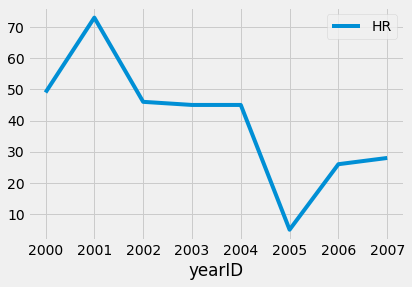

In [267]:
df.plot(x='yearID', y='HR')
plt.show()

After calling  `df.plot` , which creates our line plot, we then use  `plt.show`  to open a separate window containing the visualization of the plot. You can also use  `plt.savefig`  to save the plot to a PNG or PDF file.

In [268]:
df

,yearID,HR
0,2000,49
1,2001,73
2,2002,46
3,2003,45
4,2004,45
5,2005,5
6,2006,26
7,2007,28


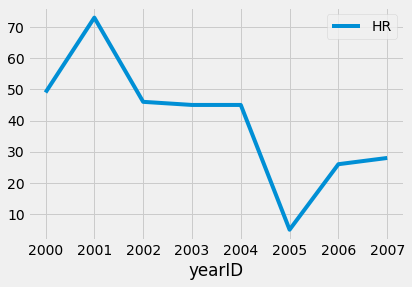

In [269]:
df.plot(x='yearID', y='HR')
plt.savefig('df.png')  # save to PNG file

The plot we created has no title or  *y* -axis label. We can manually set the plot's title and axis labels using the pyplot API.

In [270]:
df

,yearID,HR
0,2000,49
1,2001,73
2,2002,46
3,2003,45
4,2004,45
5,2005,5
6,2006,26
7,2007,28


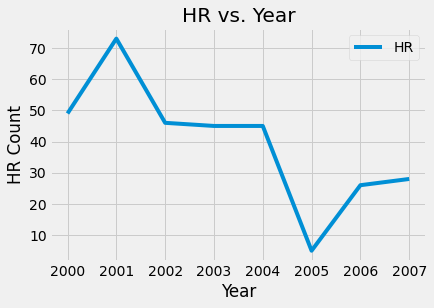

In [271]:
df.plot(x='yearID', y='HR')
plt.title('HR vs. Year')
plt.xlabel('Year')
plt.ylabel('HR Count')
plt.show()

We use the  `title`  function to set the title of our plot, and the  `xlabel`  and  `ylabel`  functions to set the axis labels.

### B. Other plots

In addition to basic line plots, we can create other plots like histograms or boxplots by setting the  `kind`  keyword argument in  `plot` .

In [272]:
df

,yearID,HR
0,2000,49
1,2001,73
2,2002,46
3,2003,45
4,2004,45
5,2005,5
6,2006,26
7,2007,28


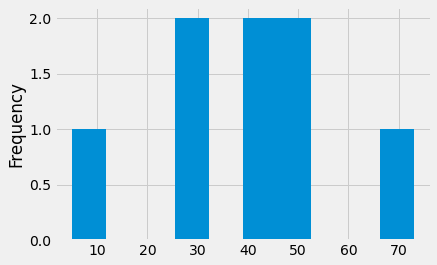

In [273]:
df.HR.plot(kind='hist')
plt.show()

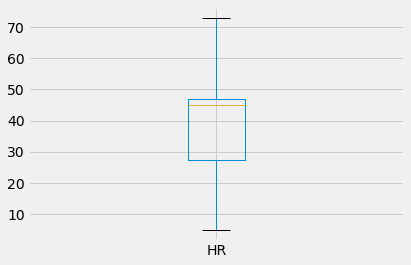

In [274]:
df.HR.plot(kind='box')
plt.show()

There are numerous different kinds of plots we can create by setting the  `kind`  keyword argument. A list of the accepted values for  `kind`  can be found in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) for  `plot` .

### C. Multiple features

We can also plot multiple features on the same graph. This can be extremely useful when we want visualizations to compare different features.

In [275]:
df = pd.DataFrame(
    {
        'yearID': [2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007], 
        'H': [147, 156, 149, 133, 135, 12, 99, 94], 
        'BB': [117, 177, 198, 148, 232, 9, 115, 132]
    }
)
df

,yearID,H,BB
0,2000,147,117
1,2001,156,177
2,2002,149,198
3,2003,133,148
4,2004,135,232
5,2005,12,9
6,2006,99,115
7,2007,94,132


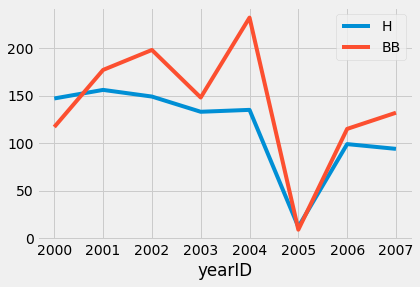

In [276]:
df.plot(x='yearID')
plt.show()

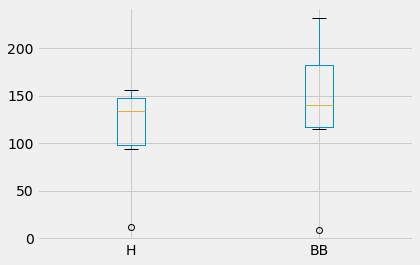

In [277]:
df[['H', 'BB']].plot(kind='box')
plt.show()

These are a line plot and boxplot showing both hits ( `H` ) and walks ( `BB` ). Note that the circles in the boxplot represent outlier values.

## To NumPy

Understand how DataFrames can be converted to 2-D NumPy arrays.

### Goals:

* Explore how to convert a DataFrame to a NumPy matrix
* Write code to modify an MLB dataset and convert it to a NumPy matrix

### A. Machine learning

The DataFrame object is great for storing a dataset and performing data analysis in Python. However, most machine learning frameworks (e.g. TensorFlow), work directly with NumPy data. Furthermore, the NumPy data used as input to machine learning models must solely contain quantitative values.

Therefore, to use a DataFrame's data with a machine learning model, we need to convert the DataFrame to a NumPy matrix of quantitative data. So even the categorical features of a DataFrame, such as gender and birthplace, must be converted to quantitative values.

### B. Indicator features

When converting a DataFrame to a NumPy matrix of quantitative data, we need to find a way to modify the categorical features in the DataFrame.

The easiest way to do this is to convert each categorical feature into a set of  *indicator features*  for each of its categories. The indicator feature for a specific category represents whether or not a given data sample belongs to that category.

The code below shows a DataFrame with indicator features.

In [278]:
df = pd.DataFrame(
    {
        'color': {'r3': 'green', 'r4': 'red', 'r6': 'blue', 'r5': 'red', 'r1': 'red', 'r2': 'blue'}
    }
)
df

,color
r1,red
r2,blue
r3,green
r4,red
r5,red
r6,blue


In [279]:
pd.get_dummies(df)

,color_blue,color_green,color_red
r1,0,0,1
r2,1,0,0
r3,0,1,0
r4,0,0,1
r5,0,0,1
r6,1,0,0


In the code above, the DataFrame  `df`  has a single categorical feature called  `Color` . The corresponding indicator features for  `Color`  are shown in  `indicator_df` .

Note that an indicator feature contains  `1`  when the row has that particular category, and  `0`  if the row does not.

### C. Converting to indicators

In pandas, we convert each categorical feature of a DataFrame to indicator features with the  `get_dummies`  function. The function takes in a DataFrame as its required argument, and returns the DataFrame with each of its categorical features converted to indicator features.

The code below demonstrates how to use the  `get_dummies`  function.

In [280]:
df = pd.DataFrame(
    {
        'lgID': {'polangr01': 'NL', 'pedrodu01': 'AL', 'bettsmo01': 'AL', 'martest01': 'NL'}, 
        'teamID': {'polangr01': 'PIT', 'pedrodu01': 'BOS', 'bettsmo01': 'BOS', 'martest01': 'PIT'}
    }
)
df

,lgID,teamID
polangr01,NL,PIT
pedrodu01,AL,BOS
bettsmo01,AL,BOS
martest01,NL,PIT


In [281]:
converted = pd.get_dummies(df)
converted.columns

Index(['lgID_AL', 'lgID_NL', 'teamID_BOS', 'teamID_PIT'], dtype='object')

In [282]:
converted[['teamID_BOS', 'teamID_PIT']]

,teamID_BOS,teamID_PIT
polangr01,0,1
pedrodu01,1,0
bettsmo01,1,0
martest01,0,1


In [283]:
converted[['lgID_AL', 'lgID_NL']]

,lgID_AL,lgID_NL
polangr01,0,1
pedrodu01,1,0
bettsmo01,1,0
martest01,0,1


> Note: The indicator features have the original categorical feature's label as a prefix. This makes it easy to see where each indicator feature originally came from.

### D. Converting to NumPy

After converting all the categorical features to indicator features, the DataFrame should have all quantitative data. We can then convert to a NumPy matrix using the  `values`  function.

The code below converts a DataFrame,  `df`  into a NumPy matrix.

In [284]:
df = pd.DataFrame(
    {
        'teamID_BOS': {'martest01': 0, 'pedrodu01': 1, 'bettsmo01': 1, 'polangr01': 0}, 
        'teamID_PIT': {'martest01': 1, 'pedrodu01': 0, 'bettsmo01': 0, 'polangr01': 1}, 
        'HR': {'martest01': 7, 'pedrodu01': 7, 'bettsmo01': 24, 'polangr01': 11}
    }
)
df

,teamID_BOS,teamID_PIT,HR
martest01,0,1,7
pedrodu01,1,0,7
bettsmo01,1,0,24
polangr01,0,1,11


In [285]:
n_matrix = df.values
n_matrix

array([[ 0,  1,  7],
       [ 1,  0,  7],
       [ 1,  0, 24],
       [ 0,  1, 11]])

The rows and columns of the output matrix correspond to the rows and columns of the same position in the DataFrame. In the code above, the first column of the NumPy matrix represents  `HR` , the second column represents  `teamID_BOS` , and the third column represents  `teamID_PIT` .

# 4. Data Preprocessing with scikit-learn

## Introduction

An overview of industry data science and the scikit-learn API.

In the  **Data Preprocessing**  section, we will explore the data preprocessing techniques with scikit-learn, one of the most popular frameworks used for industry data science.

### A. ML engineering vs. data science

In industry, there is quite a bit of overlap between machine learning engineering and data science. Both jobs involve working with data, such as data analysis and data preprocessing.

The main task for machine learning engineers is to first analyze the data for viable trends, then create an efficient input pipeline for training a model. This process involves using libraries like [NumPy](http://www.numpy.org/) and [pandas](https://pandas.pydata.org/) for handling data, along with machine learning frameworks like TensorFlow for creating the model and input pipeline.

While the NumPy and pandas libraries are also used in data science, the  **Data Preprocessing**  section will cover one of the core libraries that is specific to industry-level data science: [scikit-learn](https://scikit-learn.org/stable/). Data scientists tend to work on smaller datasets than machine learning engineers, and their main goal is to analyze the data and quickly extract usable results. Therefore, they focus more on traditional data inference models (found in scikit-learn), rather than deep neural networks.

The scikit-learn library includes tools for data preprocessing and data mining. It is imported in Python via the statement  `import sklearn` .

## Standardizing Data

Exploring data standardization and implement it with scikit-learn.

### Goals:

* Explore data standardization

### A. Standard data format

Data can contain all sorts of different values. For example, Olympic 100m sprint times will range from 9.5 to 10.5 seconds, while calorie counts in large pepperoni pizzas can range from 1500 to 3000 calories. Even data measuring the exact same quantities can range in value (e.g. weight in kilograms vs. weight in pounds).

When data can take on any range of values, it makes it difficult to interpret. Therefore, data scientists will convert the data into a standard format to make it easier to understand. The standard format refers to data that has 0 mean and unit variance (i.e. standard deviation = 1), and the process of converting data into this format is called  *data standardization* .

Data standardization is a relatively simple process. For each data value,  *x* , we subtract the overall mean of the data, μ, then divide by the overall standard deviation, $\sigma$. The new value,  *z* , represents the standardized data value. Thus, the formula for data standardization is:

$$
z = \frac{x - μ }{\sigma}
$$

### B. NumPy and scikit-learn

For most scikit-learn functions, the input data comes in the form of a NumPy array.

**Note:**  The array’s rows represent individual data observations, while each column represents a particular feature of the data, i.e. the same format as a spreadsheet data table.

The scikit-learn data preprocessing module is called  `sklearn.preprocessing` . One of the functions in this module,  `scale` , applies data standardization to a given axis of a NumPy array.

In [286]:
pizza_data = np.array([[2100,   10,  800],
                       [2500,   11,  850],
                       [1800,   10,  760],
                       [2000,   12,  800],
                       [2300,   11,  810]])
pizza_data

array([[2100,   10,  800],
       [2500,   11,  850],
       [1800,   10,  760],
       [2000,   12,  800],
       [2300,   11,  810]])

In [287]:
# Standardizing each column of pizza_data
col_standardized = scale(pizza_data)
col_standardized

array([[-0.16552118, -1.06904497, -0.1393466 ],
       [ 1.4896906 ,  0.26726124,  1.60248593],
       [-1.40693001, -1.06904497, -1.53281263],
       [-0.57932412,  1.60356745, -0.1393466 ],
       [ 0.66208471,  0.26726124,  0.2090199 ]])

In [288]:
# Column means (rounded to nearest thousandth)
col_means = col_standardized.mean(axis=0).round(decimals=3)
col_means

array([ 0., -0.,  0.])

In [289]:
# Column standard deviations
col_stds = col_standardized.std(axis=0)
col_stds

array([1., 1., 1.])

We normally standardize the data independently across each feature of the data array. This way, we can see how many standard deviations a particular observation's feature value is from the mean.

For example, the second data observation in  `pizza_data`  has a net weight of 1.6 standard deviations above the mean pizza weight in the dataset.

If for some reason we need to standardize the data across rows, rather than columns, we can set the  `axis`  keyword argument in the  `scale`  function to 1. This may be the case when analyzing data within observations, rather than within a feature. An example of this would be analyzing a particular student's test scores in terms of standard deviations from that student's average test score.

## Data Range

Create a function to compress data into a specific range of values.

### Goals:

* Explore how to compress data values to a specified range

### A. Range scaling

Apart from standardizing data, we can also scale data by compressing it into a fixed range. One of the biggest use cases for this is compressing data into the range [0, 1]. This allows us to view the data in terms of proportions, or percentages, based on the minimum and maximum values in the data.

The formula for scaling based on a range is a two-step process. For a given data value,  $x$ , we first compute the proportion of the value with respect to the min and max of the data  $d_{min}$ and  $d_{max}$, respectively).

$$
x_{prop} = \frac{x - d{min}}{d_{max}-d_{min}}
$$

The formula above computes the proportion of the data value, $x_{prop}$. Note that this only works if not all the data values are the same (i.e.$d_{max} \neq d_{min}$).

We then use the proportion of the value to scale to the specified range, $[r_{min}, r_{max}]$. The formula below calculates the new scaled value, $x_{scale}$.

$$
x_{scale} = x_{prop}.(r_{max}-r_{min}) + r_{min}
$$

### B. Range compression in scikit-learn

The scikit-learn library provides a variety of  *transformers* , modules that perform transformations on data. While in the previous chapter we used a single function,  `scale` , to perform the data standardization, the remaining chapters will focus on using these transformer modules.

The  `MinMaxScaler`  transformer performs the range compression using the previous formula. Specifically, it scales each feature (column) of the data to a given range (where the default range is [0, 1]).

The code below shows how to use the  `MinMaxScaler`  (with the default range and a custom range).

The  `MinMaxScaler`  object contains a function called  `fit_transform` , which allows it to take in the input data array and then output the scaled data. The function is a combination of the object's  `fit`  and  `transform`  functions, where the former takes in an input data array and the latter transforms a (possibly different) array based on the data from the input to the  `fit`  function.

In [290]:
data = np.array([[ 1.2,  3.2],
                 [-0.3, -1.2],
                 [ 6.5, 10.1],
                 [ 2.2, -8.4]])
data

array([[ 1.2,  3.2],
       [-0.3, -1.2],
       [ 6.5, 10.1],
       [ 2.2, -8.4]])

In [291]:
default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(data)
transformed

array([[0.22058824, 0.62702703],
       [0.        , 0.38918919],
       [1.        , 1.        ],
       [0.36764706, 0.        ]])

In [292]:
custom_scaler = MinMaxScaler(feature_range=(-2, 3))
transformed = custom_scaler.fit_transform(data)
transformed

array([[-0.89705882,  1.13513514],
       [-2.        , -0.05405405],
       [ 3.        ,  3.        ],
       [-0.16176471, -2.        ]])

Now lets run the  `fit`  and  `transform`  functions separately and compare them with the  `fit_transform`  function.  `fit`  takes in an input data array and  `transform`  transforms a (possibly different) array based on the data from the input to the fit function.

In [293]:
new_data = np.array([[ 1.2, -0.5],
                     [ 5.3,  2.3],
                     [-3.3,  4.1]])
new_data

array([[ 1.2, -0.5],
       [ 5.3,  2.3],
       [-3.3,  4.1]])

In [294]:
default_scaler = MinMaxScaler() # the default range is [0,1]
transformed = default_scaler.fit_transform(new_data)
transformed

array([[0.52325581, 0.        ],
       [1.        , 0.60869565],
       [0.        , 1.        ]])

In [295]:
default_scaler = MinMaxScaler()  # new instance
default_scaler.fit(data)  # different data value fit
transformed = default_scaler.transform(new_data)
transformed

array([[ 0.22058824,  0.42702703],
       [ 0.82352941,  0.57837838],
       [-0.44117647,  0.67567568]])

The code above scales the  `new_data`  array to the range [0, 1], based on the (column-wise) minimum and maximum values from the  `data`  array in the original code example.

## Robust Scaling

Understanding how outliers can affect data and implement robust scaling.

### Goals:

* Exploring how to scale data without being affected by outliers

### A. Data outliers

An important aspect of data that we have to deal with is  *outliers* . In general terms, an outlier is a data point that is significantly further away from the other data points. For example, if we had watermelons of weights 5, 4, 6, 7, and 20 pounds, the 20 pound watermelon is an outlier.

![widget](https://www.educative.io/api/collection/6083138522447872/5629499534213120/page/5172785596858368/image/5630721452408832.png)

A 2-D data plot with the outlier data points circled. Note that the outliers in this plot are exaggerated, and in real life outliers are not usually this far from the non-outlier data.

The data scaling methods from the previous two chapters are both affected by outliers. Data standardization uses each feature's mean and standard deviation, while ranged scaling uses the maximum and minimum feature values, meaning that they're both susceptible to being skewed by outlier values.

We can robustly scale the data, i.e. avoid being affected by outliers, by using use the data's median and [Interquartile Range (IQR)](https://en.wikipedia.org/wiki/Interquartile_range). Since the median and IQR are percentile measurements of the data (50% for median, 25% to 75% for the IQR), they are not affected by outliers. For the scaling method, we just subtract the median from each data value then scale to the IQR.

### B. Robust scaling with scikit-learn

In scikit-learn, we perform robust scaling with the  `RobustScaler`  module. It is another transformer object, with the same  `fit` ,  `transform` , and  `fit_transform`  functions described in the previous chapter.

The code below shows how to use the  `RobustScaler` .

In [296]:
data = np.array([[ 1.2,  2.3],
                 [ 2.1,  4.2],
                 [-1.9,  3.1],
                 [-2.5,  2.5],
                 [ 0.8,  3. ],
                 [ 6.3,  2.1],
                 [-1.5,  2.7],
                 [ 1.4,  2.9],
                 [ 1.8,  3.2]])
robust_scaler = RobustScaler()
transformed = robust_scaler.fit_transform(data)
transformed

array([[ 0.        , -1.        ],
       [ 0.27272727,  2.16666667],
       [-0.93939394,  0.33333333],
       [-1.12121212, -0.66666667],
       [-0.12121212,  0.16666667],
       [ 1.54545455, -1.33333333],
       [-0.81818182, -0.33333333],
       [ 0.06060606,  0.        ],
       [ 0.18181818,  0.5       ]])

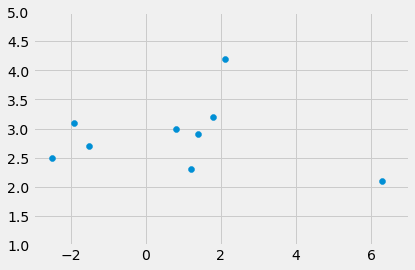

In [297]:
plt.scatter(data[:,0], data[:,1])
plt.xlim((-3, 7))
plt.ylim((1, 5))
plt.show()

## Normalizing Data

Learn about data normalization and implement a normalization function.

### Goals:

* Exploring how to apply L2 normalization to data

### L2 normalization

So far, each of the scaling techniques we've used has been applied to the data features (i.e. columns). However, in certain cases we want to scale the individual data observations (i.e. rows). For instance, when clustering data we need to apply L2 normalization to each row, in order to calculate [cosine similarity scores](https://en.wikipedia.org/wiki/Cosine_similarity).

L2 normalization applied to a particular row of a data array will divide each value in that row by the row's [L2 norm](http://mathworld.wolfram.com/L2-Norm.html). In general terms, the L2 norm of a row is just the square root of the sum of squared values for the row.

$$
X = [x_1, x_2, ..., x_m]\\
X_{L2} = [\frac{x_1}{\ell}, \frac{x_2}{\ell}, ..., \frac{x_m}{\ell}], where \ \ell = \sqrt{\sum_{i=1}^{m}{x_i}^2}
$$

The above formula demonstrates L2 normalization applied to row  *X*  to obtain the normalized row of values,  *X* L2.

In sci-kit-learn, the transformer module that implements L2 normalization is the  `Normalizer` .

The code below shows how to use the  `Normalizer`.

In [298]:
data = np.array([[4, 1, 2, 2],
       [3, 4, 0, 0],
       [7, 5, 9, 2]])
data

array([[4, 1, 2, 2],
       [3, 4, 0, 0],
       [7, 5, 9, 2]])

In [299]:
normalizer = Normalizer()
transformed = normalizer.fit_transform(data)
transformed

array([[0.8       , 0.2       , 0.4       , 0.4       ],
       [0.6       , 0.8       , 0.        , 0.        ],
       [0.55513611, 0.39652579, 0.71374643, 0.15861032]])

## Data Imputation

Learn about data imputation and the various methods to accomplish it.

### Goals:

* Exploring different methods for imputing data

### A. Data imputation methods

In real life, we often have to deal with data that contains missing values. Sometimes, if the dataset is missing too many values, we just don't use it. However, if only a few of the values are missing, we can perform [data imputation](https://en.wikipedia.org/wiki/Imputation_(statistics)) to substitute the missing data with some other value(s).

There are many different methods for data imputation. In scikit-learn, the  `SimpleImputer`  transformer performs four different data imputation methods.

The four methods are:
* Using the mean value
* Using the median value
* Using the most frequent value
* Filling in missing values with a constant

The code below shows how to perform data imputation using mean values from each column.

In [300]:
data = np.array([[ 1.,  2., np.NaN,  2.],
       [ 5., np.NaN,  1.,  2.],
       [ 4., np.NaN,  3., np.NaN],
       [ 5.,  6.,  8.,  1.],
       [np.NaN,  7., np.NaN,  0.]])
data

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

In [301]:
imp_mean = SimpleImputer()
transformed = imp_mean.fit_transform(data)
transformed

array([[1.  , 2.  , 4.  , 2.  ],
       [5.  , 5.  , 1.  , 2.  ],
       [4.  , 5.  , 3.  , 1.25],
       [5.  , 6.  , 8.  , 1.  ],
       [3.75, 7.  , 4.  , 0.  ]])

In NumPy arrays, missing data is represented by the  `np.nan`  value. In the above example, we replaced each missing value with the mean of the values in its column.

The default imputation method for  `SimpleImputer`  is using the column means. By using the  `strategy`  keyword argument when initializing a  `SimpleImputer`  object, we can specify a different imputation method.

The code below demonstrates various initialization strategies for  `SimpleImputer` .

In [302]:
data = np.array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])
data

array([[ 1.,  2., nan,  2.],
       [ 5., nan,  1.,  2.],
       [ 4., nan,  3., nan],
       [ 5.,  6.,  8.,  1.],
       [nan,  7., nan,  0.]])

In [303]:
imp_median = SimpleImputer(strategy='median')
transformed = imp_median.fit_transform(data)
transformed

array([[1. , 2. , 3. , 2. ],
       [5. , 6. , 1. , 2. ],
       [4. , 6. , 3. , 1.5],
       [5. , 6. , 8. , 1. ],
       [4.5, 7. , 3. , 0. ]])

In [304]:
imp_frequent = SimpleImputer(strategy='most_frequent')
transformed = imp_frequent.fit_transform(data)
transformed

array([[1., 2., 1., 2.],
       [5., 2., 1., 2.],
       [4., 2., 3., 2.],
       [5., 6., 8., 1.],
       [5., 7., 1., 0.]])

The  `'median'`  strategy fills in missing data with the median from each column, while the  `'most_frequent'`  strategy uses the value that appears the most for each column.

The final imputation method that  `SimpleImputer`  provides is to fill in missing values with a specified constant. This can be useful if there is already a suitable substitute for missing data (e.g. 0 or -1).

The code below demonstrates how to fill in missing data with a specific constant. The  `fill_value`  keyword argument is used when initializing the  `SimpleImputer`  object, to specify the constant.

In [305]:
imp_constant = SimpleImputer(strategy='constant',
                             fill_value=-1)
transformed = imp_constant.fit_transform(data)
transformed

array([[ 1.,  2., -1.,  2.],
       [ 5., -1.,  1.,  2.],
       [ 4., -1.,  3., -1.],
       [ 5.,  6.,  8.,  1.],
       [-1.,  7., -1.,  0.]])

### B. Other imputation methods

The  `SimpleImputer`  object only implements the four imputation methods shown in section  **A** . However, data imputation is not limited to those four methods.

There are also more advanced imputation methods such as [k-Nearest Neighbors](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (filling in missing values based on similarity scores from the kNN algorithm) and [MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/) (applying multiple chained imputations, assuming the missing values are randomly distributed across observations).

In most industry cases these advanced methods are not required, since the data is either perfectly cleaned or the missing values are scarce. Nevertheless, the advanced methods could be useful when dealing with open source datasets, since these tend to be more incomplete.

## PCA

Exploring PCA and why it's useful for data preprocessing.

### Goals:

* Explore principal component analysis and why it's used

### A. Dimensionality reduction

Most datasets contain a large number of features, some of which are redundant or not informative. For example, in a dataset of basketball statistics, the total points and points per game for a player will (most of the time) tell the same story about the player's scoring prowess.

When a dataset contains these types of correlated numeric features, we can perform [principal component analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) for dimensionality reduction (i.e. reducing the number of columns in the data array).

PCA extracts the  *principal components*  of the dataset, which are an uncorrelated set of [latent variables](https://en.wikipedia.org/wiki/Latent_variable) that encompass most of the information from the original dataset. Using a smaller set of principal components can make it a lot easier to use the dataset in statistical or machine learning models (especially when the original dataset contains many correlated features).

### B. PCA in scikit-learn

Like every other data transformation, we can apply PCA to a dataset in scikit-learn with a transformer, in this case the  `PCA`  module. When initializing the  `PCA`  module, we can use the  `n_components`  keyword to specify the number of principal components. The default setting is to extract  *m - 1*  principal components, where  *m*  is the number of features in the dataset.

The code below shows examples of applying PCA with various numbers of principal components.

In [306]:
data = np.array([[ 1.5,  3. ,  9. , -0.5,  1. ],
       [ 2.2,  4.3,  3.5,  0.6,  2.7],
       [ 3. ,  6.1,  1.1,  1.2,  4.2],
       [ 8. , 16. ,  7.7, -1. ,  7.1]])
data

array([[ 1.5,  3. ,  9. , -0.5,  1. ],
       [ 2.2,  4.3,  3.5,  0.6,  2.7],
       [ 3. ,  6.1,  1.1,  1.2,  4.2],
       [ 8. , 16. ,  7.7, -1. ,  7.1]])

In [307]:
pca_obj = PCA() # The value of n_component will be 4. As m is 5 and default is always m-1
pc = pca_obj.fit_transform(data).round(3)
pc

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02,  0.0000e+00],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01,  0.0000e+00],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02,  0.0000e+00],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03,  0.0000e+00]])

In [308]:
pca_obj = PCA(n_components=3)
pc = pca_obj.fit_transform(data).round(3)
pc

array([[-4.8600e+00,  4.6300e+00, -4.7000e-02],
       [-3.7990e+00, -1.3180e+00,  1.2700e-01],
       [-1.8630e+00, -4.2260e+00, -8.9000e-02],
       [ 1.0522e+01,  9.1400e-01,  9.0000e-03]])

In [309]:
pca_obj = PCA(n_components=2)
pc = pca_obj.fit_transform(data).round(3)
pc

array([[-4.86 ,  4.63 ],
       [-3.799, -1.318],
       [-1.863, -4.226],
       [10.522,  0.914]])

In the code output above, notice that when PCA is applied with 4 principal components, the final column (last principal component) is all 0's. This means that there are actually only a maximum of three uncorrelated principal components that can be extracted.

## Labeled Data

Separate the PCA components of a dataset by class.

### Goals:

* Explore labeled datasets
* Separate principle component data by class label

### A. Class labels

A big part of data science is classifying observations in a dataset into separate categories, or  *classes* . A popular use case of data classification is in separating a dataset into "good" and "bad" categories. For example, we can classify a dataset of breast tumors as either malignant or benign.

The code below separates a breast cancer dataset into malignant and benign categories. The  `load_breast_cancer`  function is part of the scikit-learn library, and its data comes from the [Breast Cancer Wisconsin](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)) dataset.

In [310]:
bc = load_breast_cancer()
bc.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [311]:
bc.data.shape

(569, 30)

#### Class Labels

In [312]:
bc.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [313]:
bc.target.shape

(569,)

#### Label Names

In [314]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [315]:
malignant = bc.data[bc.target==0]
malignant.shape

(212, 30)

In [316]:
benign = bc.data[bc.target==1]
benign.shape

(357, 30)

In the example above, the  `bc.data`  array contains all the dataset values, while the  `bc.target`  array contains the class ID labels for each row in  `bc.data` . A class ID of 0 corresponds to a malignant tumor, while a class ID of 1 corresponds to a benign tumor.

Using the  `bc.target`  class IDs, we separated the dataset into malignant and benign data arrays. In other words, the  `malignant`  array contains the rows of  `bc.data`  corresponding to the indexes in  `bc.target`  containing 0, while the  `benign`  array contains the rows of  `bc.data`  corresponding to the indexes in  `bc.target`  containing 1. There are 212 malignant data observations and 357 benign observations.

In [317]:
def get_label_info(component_data, labels,
                   class_label, label_names):
  """returns the label name and data for an input class label."""
  return label_names[class_label], component_data[labels==class_label]

In [318]:
def separate_data(component_data, labels,
                  label_names):
  """separate principal component data by class."""
  return [get_label_info(component_data, labels, class_label, label_names) for class_label in range(len(label_names))]

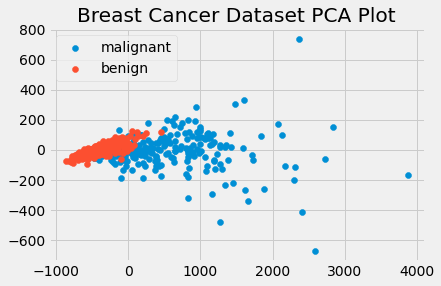

In [319]:
pca_obj = PCA(n_components=2)
component_data = pca_obj.fit_transform(bc.data)
labels = bc.target
label_names = bc.target_names

# Using the completed separate_data function
separated_data = separate_data(component_data,
                               labels, label_names)

# Plotting the data
plt.style.use("fivethirtyeight")
for label_name, label_data in separated_data:
    col1 = label_data[:, 0]  # 1st column (1st pr. comp.)
    col2 = label_data[:, 1]  # 2nd column (2nd pr. comp.)
    plt.scatter(col1, col2, label=label_name) # scatterplot

plt.legend()  # adds legend to plot
plt.title('Breast Cancer Dataset PCA Plot')
plt.show()

# Data Modeling with scikit-learn

## Introduction

An overview of the main models used in scikit-learn. We will be creating a variety of models for linear regression and classifying data. We will also explore how to perform hyperparameter tuning and model evaluation through cross-validation.

### A. Creating models for data

The main job of a data scientist is analyzing data and creating models for obtaining results from the data. Oftentimes, data scientists will use simple statistical models for their data, rather than machine learning models like neural networks. This is because data scientists tend to work with smaller datasets than machine learning engineers, so they can quickly extract good results using statistical models.

The scikit-learn library provides many statistical models for [linear regression](https://en.wikipedia.org/wiki/Linear_regression). It also provides a few good models for classifying data.
When creating these models, data scientists need to figure out the optimal [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter) to use. Hyperparameters are values that we set when creating a model, e.g. certain constant coefficients used in the model's calculations.

## Linear Regression

Explore basic linear regression and how it's used.

### Goals:

* Create a basic linear regression model based on input data and labels

### A. What is linear regression?

One of the main objectives in both machine learning and data science is finding an equation or distribution that best fits a given dataset. This is known as data modeling, where we create a model that uses the dataset's features as independent variables to predict output values for some dependent variable (with minimal error). However, it is incredibly difficult to find an optimal model for most datasets, given the amount of noise (i.e. random errors/fluctuations) in real world data.

Since finding an optimal model for a dataset is difficult, we instead try to find a good approximating distribution. In many cases, a linear model (a [linear combination](http://mathworld.wolfram.com/LinearCombination.html) of the dataset's features) can approximate the data well. The term  *linear regression*  refers to using a linear model to represent the relationship between a set of independent variables and a dependent variable.

$$
y = ax_1 + bx_2 + cx_3 + d
$$

The above formula is example linear model which produces output y (dependent variable) based on the linear combination of independent variables $x_1$, $x_2$, $x_3$. The coefficients $a$, $b$, $c$ and intercept $d$ determine the model's fit.

### B. Basic linear regression

The simplest form of linear regression is called [least squares regression](https://en.wikipedia.org/wiki/Least_squares). This strategy produces a regression model, which is a linear combination of the independent variables, that minimizes the [sum of squared residuals](https://en.wikipedia.org/wiki/Residual_sum_of_squares) between the model's predictions and actual values for the dependent variable.

In scikit-learn, the least squares regression model is implemented with the  `LinearRegression`  object, which is a part of the  `linear_model`  module in  `sklearn` . The object contains a  `fit`  function, which takes in an input dataset of features (independent variables) and an array of labels (dependent variables) for each data observation (rows of the dataset).

The code below demonstrates how to fit a  `LinearRegression`  model to a dataset of 5 different pizzas ( `pizza_data` ) and corresponding pizza prices. The first column of  `pizza_data`  represents the number of calories and the second column represents net weight (in grams).

In [320]:
pizza_data = np.array(
    [[2100,  800],
     [2500,  850],
     [1800,  760],
     [2000,  800],
     [2300,  810]]
)
pizza_data

array([[2100,  800],
       [2500,  850],
       [1800,  760],
       [2000,  800],
       [2300,  810]])

In [321]:
pizza_prices = np.array([10.99, 12.5 ,  9.99, 10.99, 11.99])
pizza_prices

array([10.99, 12.5 ,  9.99, 10.99, 11.99])

In [322]:
reg = LinearRegression()
reg.fit(pizza_data, pizza_prices)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

After calling the  `fit`  function, the model is ready to use. The  `predict`  function allows us to make predictions on new data.

We can also get the specific coefficients and intercept for the linear combination using the  `coef_`  and  `intercept_`  properties, respectively.

Finally, we can retrieve the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination) (or $R^2$ value) using the  `score`  function applied to the dataset and labels. The $R^2$ value tells us how close of a fit the linear model is to the data, or in other words, how good of a fit the model is for the data.

In [323]:
# new pizza data
new_pizzas = np.array(
    [[2000,  820],
     [2200,  830]]
)

price_predicts = reg.predict(new_pizzas)
price_predicts

array([10.86599206, 11.55111111])

In [324]:
print(f'Coefficients: {reg.coef_}')
print(f'Intercept: {reg.intercept_}')

Coefficients: [0.00330913 0.00232937]
Intercept: 2.3376587301587346


In [325]:
r2 = reg.score(pizza_data, pizza_prices)
r2

0.9758349388652625

The traditional $R^2$ value is a real number between 0 and 1. In scikit-learn it ranges from -∞ to 1, where lower values denote a poorer model fit to the data. The closer the value is to 1, the better the model's fit on the data. In the example above, we see that the model is a near perfect fit for the pizza data.

## Ridge Regression

Understand the need for regularization in linear regression.

### Goals:

* Explore regularization in linear regression
* Explore hyperparameter tuning using cross-validation
* Implement a cross-validated ridge regression model in scikit-learn

While ordinary least squares regression is a good way to fit a linear model onto a dataset, it relies on the fact that the dataset's features are each independent, i.e. uncorrelated. When many of the dataset features are linearly correlated, e.g. if a dataset has multiple features depicting the same price in different currencies, it makes the least squares regression model highly sensitive to noise in the data.

Because real life data tends to have noise, and will often have some linearly correlated features in the dataset, we combat this by performing  *regularization* . For ordinary least squares regression, the goal is to find the weights (coefficients) for the linear model that minimize the sum of squared residuals:

$$
\sum_{i=1}^n(X_i \cdot w-y_i)^2\\
\mbox{where  each} \  X_i \ \mbox{represents  a  data  observation  and} \  y_i \ \mbox{is  the  corresponding  label.}
$$
For regularization, the goal is to not only minimize the sum of squared residuals but to do this with coefficients as small as possible. The smaller the coefficients, the less susceptible they are to random noise in the data. The most commonly used form of regularization is [ridge regularization](https://en.wikipedia.org/wiki/Tikhonov_regularization).

With ridge regularization, the goal is now to find the weights that minimize the following quantity:
$$
\alpha \| w \|_2^2+\sum_{i=1}^n(X_i\cdot w-y_i)^2\\
\mbox{where }\alpha \mbox{ is a non-negative real number hyperparameter and }\| w\| _2^2 \\ \mbox{ represents the L2 norm of the weights.}\\ \mbox{ The additional }\alpha \| w \|_2^2 \mbox{ is referred to as the }  \textbf{penalty term}\mbox{ , since it penalizes larger weight values.}\\ \mbox{ Larger quantities of }\alpha \mbox{ will put greater emphasis on the penalty term, forcing the model to have even smaller weight values.}
$$

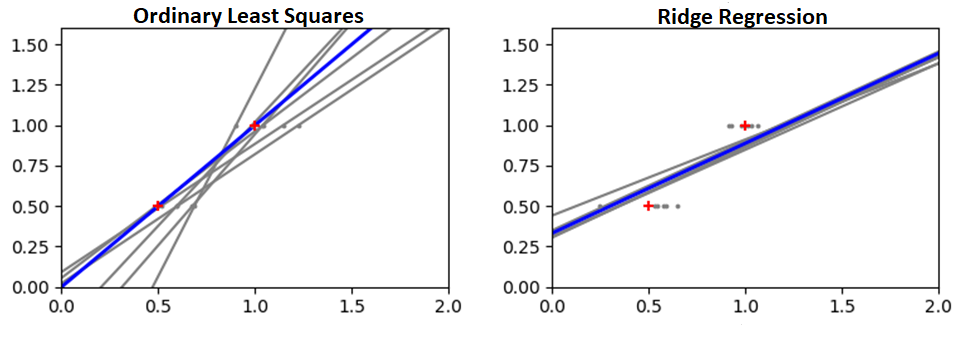

The plot above shows an example of ordinary least squares regression models vs. ridge regression models. The two red crosses mark the points (0.5, 0.5) and (1, 1), and the blue lines are the regression lines for those two points. Each of the grey lines are the regression lines for the original points with added noise (which is signified by the grey points).

The ordinary least squares regression is much more susceptible to being influenced by the added noise, as there is a much larger degree of variance in the grey regression lines compared to the ridge regression.

### B. Choosing the best alpha

In scikit-learn, we implement ridge regression in essentially the same way we implement ordinary least squares regression. We use the  `Ridge`  object (part of the  `linear_model`  module) to implement ridge regression.

The code below fits a  `Ridge`  object on the pizza dataset from the previous chapter.

In [326]:
ridge = Ridge()
ridge.fit(pizza_data, pizza_prices)
print(f'Coefficients: {ridge.coef_}\nIntercept: {ridge.intercept_}')

Coefficients: [0.00330976 0.00232372]
Intercept: 2.340845980549572


In [327]:
r2_ridge = ridge.score(pizza_data, pizza_prices)
r2_ridge

0.9758349359826238

We can specify the value of the $\alpha$ hyperparameter when initializing the  `Ridge`  object (the default is 1.0). However, rather than manually choosing a value, we can use  *cross-validation*  to help us choose the optimal $\alpha$ from a list of values.

In [328]:
alphas = [0.1, 0.2, 0.3]
reg = RidgeCV(alphas=alphas)
reg.fit(pizza_data, pizza_prices)

print(f"""Coeffiecients: {reg.coef_}
Intercept: {reg.intercept_}
Alphas: {reg.alpha_}""")

Coeffiecients: [0.00330932 0.00232767]
Intercept: 2.338616853432976
Alphas: 0.3


## LASSO Regression
Apply regularization with LASSO regression.

### Goals:
* Explore sparse linear regression via LASSO

### A. Sparse regularization

While ridge regularization uses an L2 norm penalty term, another regularization method called [LASSO](https://en.wikipedia.org/wiki/Lasso_(statistics)) uses an [L1 norm](http://mathworld.wolfram.com/L1-Norm.html) for the weights penalty term. Specifically, LASSO regularization will find the optimal weights to minimize the following quantity:
$$
\alpha \|w\|_1+\sum_{i=1}^n(X_i\cdot w-y_i)^2\\
\mbox{Where }\|w\|_1\mbox{ represents the L1 norm of the weights.}
$$

LASSO regularization tends to prefer linear models with fewer parameter values. This means that it will likely zero-out some of the weight coefficients. This reduces the number of features that the model is actually dependent on (since some of the coefficients will now be 0), which can be beneficial when some features are completely irrelevant or duplicates of other features.

In scikit-learn, we implement LASSO using the  `Lasso`  object, which is part of the  `linear_model`  module. Like the  `Ridge`  object, it takes in the model's $\alpha$ value with the  `alpha`  keyword argument (default is 1.0).

The code below demonstrates how to use the  `Lasso`  object on a dataset with 150 observations and 4 features.

In [329]:
data = pd.read_csv('datasets/data2.csv').values
data[:5]

FileNotFoundError: ignored

In [330]:
labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])
labels[:5]

array([0, 0, 0, 0, 0])

In [331]:
print(f"""Data Shape: {data.shape}
Labels Shape: {labels.shape}""")

Data Shape: (4, 5)
Labels Shape: (150,)


In [332]:
reg = Lasso(alpha=.1)
reg.fit(data, labels)

print(f"""Coeffiecients: {reg.coef_}
Intercept: {reg.intercept_}
R2: {reg.score(data, labels)}""")

ValueError: ignored

In the example above, note that a majority of the weights are 0, due to the LASSO sparse weight preference.

There is also a cross-validated version in the form of the  `LassoCV`  object, which works in essentially the same way as the  `RidgeCV`  object.

## Bayesian Regression

Exploring Bayesian regression techniques.

### Goals:

* Exploring Bayesian regression techniques

### A. Bayesian techniques

we've discussed hyperparameter optimization through cross-validation. Another way to optimize the hyperparameters of a regularized regression model is with [Bayesian](https://en.wikipedia.org/wiki/Bayesian_inference) techniques.

In Bayesian statistics, the main idea is to make certain assumptions about the probability distributions of a model's parameters  *before*  being fitted on data. These initial distribution assumptions are called  *priors*  for the model's parameters.

In a Bayesian ridge regression model, there are two hyperparameters to optimize: $\alpha$ and $\lambda$. The $\alpha$ hyperparameter serves the same exact purpose as it does for regular ridge regression; namely, it acts as a scaling factor for the penalty term.

The $\lambda$ hyperparameter acts as the precision of the model's weights. Basically, the smaller the $\lambda$ value, the greater the variance between the individual weight values.

### B. Hyperparameter priors

Both the $\alpha$ and $\lambda$ hyperparameters have [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution) priors, meaning we assume both values come from a gamma probability distribution.

There's no need to know the specifics of a gamma distribution, other than the fact that it's a probability distribution defined by a [shape parameter](https://en.wikipedia.org/wiki/Shape_parameter) and [scale parameter](https://en.wikipedia.org/wiki/Scale_parameter).

Specifically, the $\alpha$ hyperparameter has prior:
$$
\Gamma(\alpha_1, \alpha_2)
$$
and the $\lambda$ hyperparameter has prior:
$$
\Gamma(\lambda_1, \lambda_2)
$$
where $\Gamma(k, \theta)$ represents a gamma distribution with shape parameter $k$ and scale parameter $\theta$.

### C. Tuning the model

When finding the optimal weight settings of a Bayesian ridge regression model for an input dataset, we also concurrently optimize the $\alpha$ and $\lambda$ hyperparameters based on their prior distributions and the input data.

This can all be done with the [ `BayesianRidge` ](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.BayesianRidge.html#sklearn.linear_model.BayesianRidge) object (part of the  `linear_model`  module). Like all the previous regression objects, this one can be initialized with no required arguments.

In [333]:
reg = BayesianRidge()
reg.fit(data, labels)

print(f"""Coefficents: {reg.coef_}
Intercept: {reg.intercept_}
R2: {reg.score(data, labels)}
Alpha: {reg.alpha_}
Lambda: {reg.lambda_}""")

ValueError: ignored

We can manually specify the $\alpha_1$ and $\alpha_2$ gamma parameters for α with the  `alpha_1`  and  `alpha_2`  keyword arguments when initializing  `BayesianRidge` . Similarly, we can manually set $\lambda_1$ and $\lambda_2$ with the  `lambda_1`  and  `lambda_2`  keyword arguments. The default value for each of the four gamma parameters is $10^{-6}$

## Logistic Regression

Implementing logistic regression for classification tasks.

### Goals:

* Exploring logistic regression for linearly separable datasets

### A. Classification

The logistic regression model, despite its name, is actually a linear model for  *classification* . It is called logistic regression because it performs regression on [logits](https://en.wikipedia.org/wiki/Logit), which then allows us to classify the data based on model probability predictions.

We implement logistic regression with the  `LogisticRegression`  object (part of the  `linear_model`  module). The default setting for  `LogisticRegression`  is  *binary classification* , i.e. classifying data observations that are labeled with either a 0 or 1.

In [334]:
data = pd.read_csv('datasets/data3.csv').values
data[:5]

FileNotFoundError: ignored

In [335]:
labels=pd.read_csv('datasets/labels.csv').values[:, 0]
labels[:5]

FileNotFoundError: ignored

In [336]:
reg = LogisticRegression()
reg.fit(data, labels)

new_data = np.array([
    [  0.3,  0.5, -1.2,  1.4],
    [ -1.3,  1.8, -0.6, -8.2]
])

print(f"Predicition Classes: {repr(reg.predict(new_data))}")

ValueError: ignored

The code above created a logistic regression model from a labeled dataset. The model predicts 1 and 0, respectively, as the labels for the observations in  `new_data` .

For  *multiclass classification* , i.e. when there are more than two labels, we initialize the  `LogisticRegression`  object with the  `multi_class`  keyword argument. The default value is  `'ovr'` , which signifies a [One-Vs-Rest](https://en.wikipedia.org/wiki/Multiclass_classification#One-vs.-rest) strategy. In multiclass classification, we want to use the  `'multinomial'`  strategy.

The code below demonstrates multiclass classification. Note that to use the  `'multinomial'`  strategy, we need to choose a proper solver (see below for details on solvers). In this case, we choose  `'lbfgs'` .

In [337]:
data = pd.read_csv('datasets/data4.csv').values
data[:5]

FileNotFoundError: ignored

In [338]:
labels = pd.read_csv('datasets/labels2.csv').values[:, 0]
labels[:5]

FileNotFoundError: ignored

In [339]:
reg = LogisticRegression(
    solver='lbfgs',
    multi_class='multinomial'
)
reg.fit(data, labels)
new_data = np.array(
    [
        [ 1.8, -0.5, 6.2, 1.4],
        [ 3.3,  0.8, 0.1, 2.5]
    ]
)
print(f"Prediction Classes: {repr(reg.predict(new_data))}")

ValueError: ignored

### B. Solvers

The  `LogisticRegression`  object uses a  *solver*  to obtain the optimal weight settings based on the input data and labels. The five solvers and their various properties are shown in the table below (which comes from the scikit-learn official [website](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression)):

![image.png](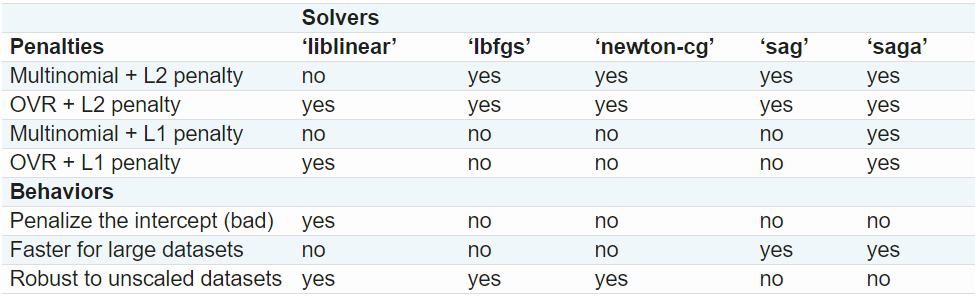 "Table of the five solvers and their properties.")

By default, the logistic regression is regularized through the L2 norm of weights. We can manually specify whether to use the L1 or L2 norm with the  `penalty`  keyword argument, by setting it as either  `'l1'`  or  `'l2'` .

We can choose a particular solver using the  `solver`  keyword argument. The default solver is currently  `'liblinear'`  (although it will change to  `'lbfgs'`  in future version). For the  `'newton-cg'` ,  `'sag'` , and  `'lbfgs'`  solvers, we can also set the maximum number of iterations the solver takes until the model's weights converge using the  `max_iter`  keyword argument. Since the default  `max_iter`  value is 100, we may want to let the solver run for a higher number of iterations in certain applications.

The code below demonstrates usage of the  `solver`  and  `max_iter`  keyword arguments.

```python
from sklearn import linear_model
reg = linear_model.LogisticRegression(
  solver='lbfgs', max_iter=1000)
```

### C. Cross-validated model

Like the ridge and LASSO regression models, the logistic regression model comes with a cross-validated version in scikit-learn. The cross-validated logistic regression object,  `LogisticRegressionCV` , is initialized and used in the same way as the regular  `LogisticRegression`  object.

The code below demonstrates usage of the  `LogisticRegressionCV`  object.

```python
from sklearn import linear_model
reg = linear_model.LogisticRegressionCV(
    solver='multinomial', max_iter=1000
)
```

## Decision Trees

Explore decision trees and how they're used.

### Goals:

* Explore decision trees and how they are constructed
* Explore how decision trees are used for classification and regression

### A. Making decisions

Each model we've looked at so far is based on creating an optimal linear combination of dataset features for either regression or classification. However, another popular model in data science for both classification and regression is the [decision tree](https://en.wikipedia.org/wiki/Decision_tree_learning). It is a [binary tree](https://en.wikipedia.org/wiki/Binary_tree) where each node of the tree decides on a particular feature of the dataset, and we descend to the node's left or right child depending on the feature's value.

If a feature is boolean, we go left or right from the node depending on if the feature value is true or false. If a feature is numeric, we can decide to go left or right based on a decision boundary for the feature (e.g. go left if the feature value is less than 1, otherwise go right).

The leaves of the decision tree determine the class label to predict (in classification) or the real number value to predict (in regression).

![image.png](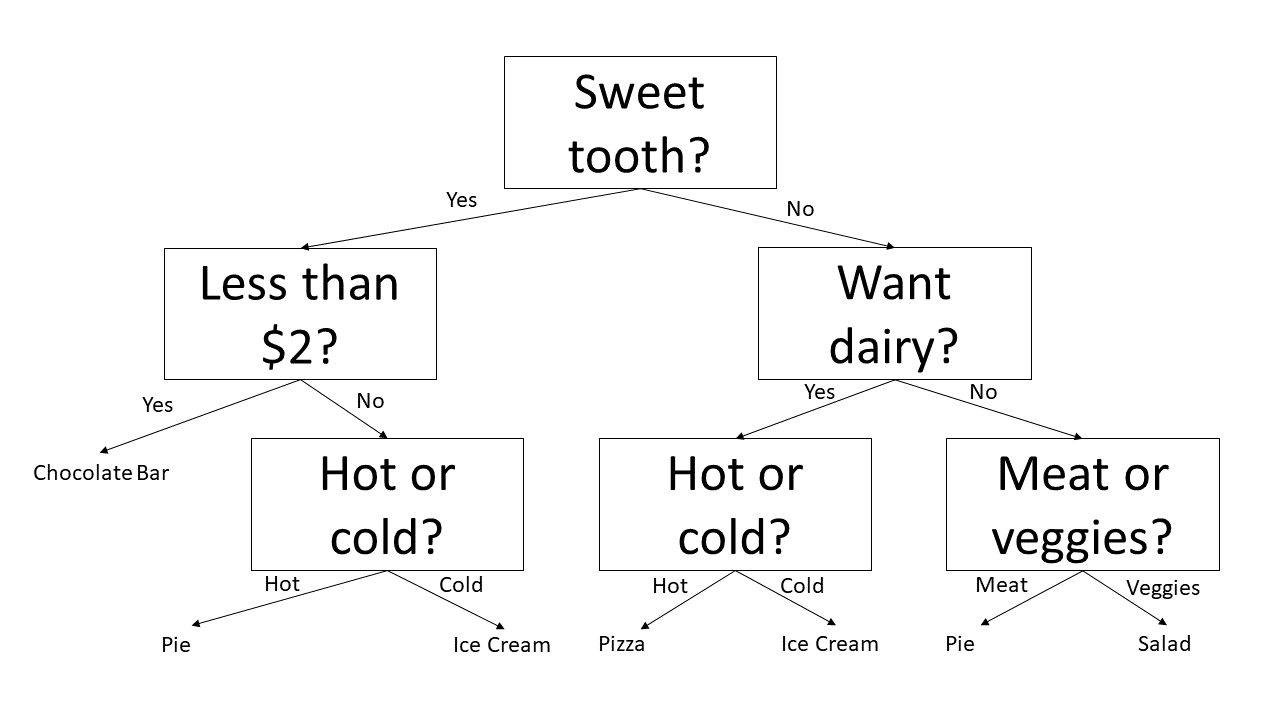 "A decision tree for deciding what to eat. This is an example of multiclass classification.")

In scikit-learn, we implement classification decision trees with the  `DecisionTreeClassifier`  object, and regression trees with the  `DecisionTreeRegressor`  object. Both objects are part of the  `tree`  module in scikit-learn.

The code below demonstrates how to create decision trees for classification and regression. Each decision tree uses the  `fit`  function for fitting on data and labels.

In [340]:
data = pd.read_csv('datasets/data5.csv').values
data[:5]

FileNotFoundError: ignored

In [341]:
labels = pd.read_csv('datasets/labels3.csv').values[:,0]
labels[:5]

FileNotFoundError: ignored

In [342]:
clf_tree1 = DecisionTreeClassifier()
reg_tree1 = DecisionTreeRegressor()
clf_tree2 = DecisionTreeClassifier(max_depth=8)
reg_tree2 = DecisionTreeRegressor(max_depth=5)

clf_tree1.fit(data, labels)

ValueError: ignored

The  `max_depth`  keyword argument lets us manually set the maximum number of layers allowed in the decision tree (i.e. the tree's maximum depth). The default value is  `None` , meaning that the decision tree will continue to be constructed until no nodes can have anymore children. Since large decision trees are prone to overfit data, it can be beneficial to manually set a maximum depth for the tree.

### B. Choosing features

Since a decision tree makes decisions based on feature values, the question now becomes how we choose the features to decide on at each node. In general terms, we want to choose the feature value that "best" splits the remaining dataset at each node.

How we define "best" depends on the decision tree algorithm that's used. Since scikit-learn uses the [CART](https://en.wikipedia.org/wiki/Predictive_analytics#Classification_and_regression_trees_.28CART.29) algorithm, we use [Gini Impurity](https://en.wikipedia.org/wiki/Decision_tree_learning#Gini_impurity), MSE (mean squared error), and MAE (mean absolute error) to decide on the best feature at each node.

Specifically, for classification trees we choose the feature at each node that minimizes the remaining dataset observations' Gini Impurity. For regression trees we choose the feature at each node that minimizes the remaining dataset observations' MSE or MAE, depending on which you choose to use (the default for  `DecisionTreeRegressor`  is MSE).

## Training and Testing

Separate a dataset into training and testing sets.

### Goals:

* Explore splitting a dataset into training and testing sets

### A. Training and testing sets

Once we fit the model, how do we evaluate it? It is a bad idea to evaluate a model solely on the same dataset it was fitted on, because the model's parameters are already tuned for that dataset. Instead, we need to split the original dataset into two datasets: one for  *training*  and one for  *testing* .

The training set is used for fitting the model on data (i.e. training the model), while the testing set is used for evaluating the model. Therefore, the training set is much larger than the testing set. Exactly how much larger depends on the application and requirements.

Increasing the size of the training set will give more data for the model to be fitted on, which can increase the model's performance. However, because this decreases the size of the testing set, there's a higher chance that the testing set may not be representative of the original dataset (which can lead to inaccurate evaluation).

In general, the testing set is around 10-30% of the original dataset, while the training set makes up the remaining 70-90%.


### B. Splitting the dataset

The scikit-learn library provides a nice utility function, called  `train_test_split`  (which is part of the  `model_selection`  module) that handles the dataset splitting for us.

The code below demonstrates how to split a dataset into training and testing sets.

In [343]:
data = np.array([
    [10.2 ,  0.5 ],
    [ 8.7 ,  0.9 ],
    [ 9.3 ,  0.8 ],
    [10.1 ,  0.4 ],
    [ 9.5 ,  0.77],
    [ 9.1 ,  0.68],
    [ 7.7 ,  0.9 ],
    [ 8.3 ,  0.8 ]
])
labels = np.array([1.4, 1.2, 1.6, 1.5, 1.6, 1.3, 1.1, 1.2])

In [344]:
split_dataset = train_test_split(data, labels)
train_data = split_dataset[0]
test_data = split_dataset[1]
train_labels = split_dataset[2]
test_labels = split_dataset[3]

print(f"""Train Data: {repr(train_data)}
Train Labels: {repr(train_labels)}
    
Test Data: {repr(test_data)}
Test Labels: {repr(test_labels)}"""
)

Train Data: array([[10.1 ,  0.4 ],
       [ 9.5 ,  0.77],
       [ 7.7 ,  0.9 ],
       [10.2 ,  0.5 ],
       [ 8.3 ,  0.8 ],
       [ 9.3 ,  0.8 ]])
Train Labels: array([1.5, 1.6, 1.1, 1.4, 1.2, 1.6])
    
Test Data: array([[9.1 , 0.68],
       [8.7 , 0.9 ]])
Test Labels: array([1.3, 1.2])


> Note: The  `train_test_split`  function randomly shuffles the dataset and corresponding labels prior to splitting. This is good practice to remove any systematic orderings in the dataset, which could potentially impact the model into training on the orderings rather than the actual data.

The default size of the testing set is 25% of the original dataset. We can use the  `test_size`  keyword argument to manually specify the proportion of the original dataset that will go into the testing set.

In [345]:
train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=.375
)

print(f"""Train Data: {repr(train_data)}
Train Labels: {repr(train_labels)}
    
Test Data: {repr(test_data)}
Test Labels: {repr(test_labels)}"""
)

Train Data: array([[ 7.7 ,  0.9 ],
       [10.1 ,  0.4 ],
       [ 9.5 ,  0.77],
       [ 8.7 ,  0.9 ],
       [10.2 ,  0.5 ]])
Train Labels: array([1.1, 1.5, 1.6, 1.2, 1.4])
    
Test Data: array([[9.1 , 0.68],
       [9.3 , 0.8 ],
       [8.3 , 0.8 ]])
Test Labels: array([1.3, 1.6, 1.2])


## Cross-Validation
Explore K-Fold cross-validation and why it's used.

### Goals:

* Explore the purpose of cross-validation
* Implement a function that applies the K-Fold cross-validation algorithm to a model

### A. Additional evaluation datasets

Sometimes, it's not enough to just have a single testing set for model evaluation. Having additional sets of data for evaluation gives us a more accurate measurement of how good the model is for the original dataset.

If the original dataset is big enough, we can actually split it into three subsets: training, testing, and validation. The validation set is about the same size as the testing set, and it is used for evaluating the model after training. The testing set is then used for final evaluation once the model is done training and tuning.

However, partitioning the original dataset into three distinct sets will cut into the size of the training set. This can reduce the performance of the model if our original dataset is not large enough. A solution to this problem is [cross-validation (CV)](https://en.wikipedia.org/wiki/Cross-validation_(statistics)).

Cross-validation creates synthetic validation sets by partitioning the training set into multiple smaller subsets. One of the most common algorithms for cross-validation, [K-Fold CV](https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation), partitions the training set into  **k**  approximately equal sized subsets (referred to as  *folds* ). There are  **k**  "rounds" of the algorithm, and each "round" chooses one of the  **k**  subsets for the validation set (a different subset is chosen each round), while the remaining  **k - 1**  subsets are aggregated into the round's training set and used to train the model.

![image.png](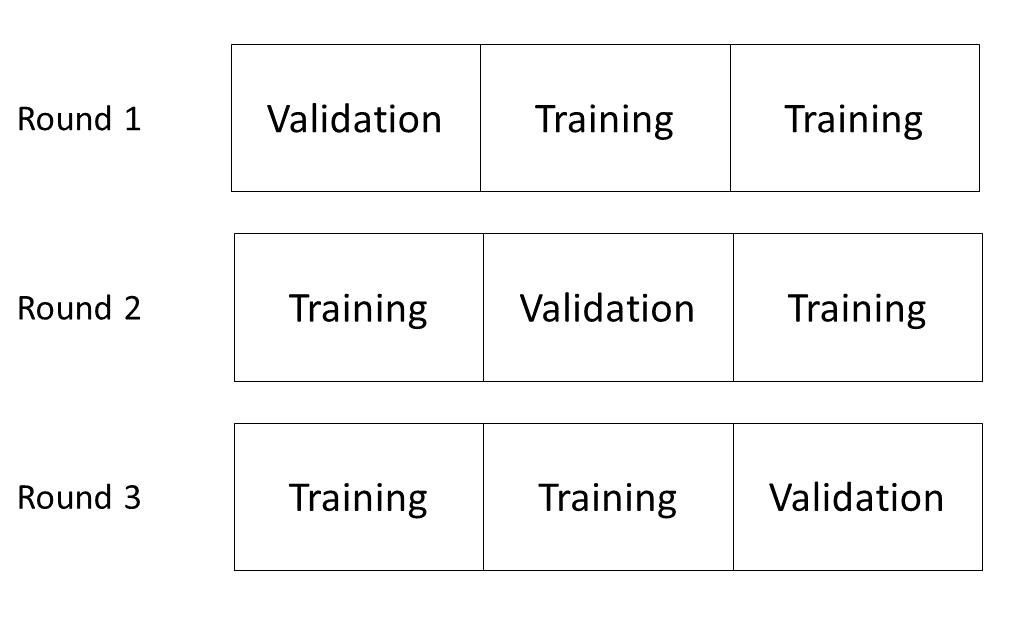 "The K-Fold cross-validation process with 3 folds (k=3)")

Each round of the K-Fold algorithm, the model is trained on that round's training set (the combined training folds) and then evaluated on the single validation fold. The evaluation metric depends on the model. For classification models, this is usually classification accuracy on the validation set. For regression models, this can either be the model's mean squared error, mean absolute error, or $R^2$ value on the validation set.

### B. Scored cross-validation

In scikit-learn, we can easily implement K-Fold cross-validation with the  `cross_val_score`  function (also part of the  `model_selection`  module). The function returns an array containing the evaluation score for each round.

The code below demonstrates K-Fold CV with 3 folds for classification. The evaluation metric is classification accuracy.

In [346]:
data = pd.read_csv('datasets/data6.csv').values
data[:3]

FileNotFoundError: ignored

In [ ]:
data.shape

In [347]:
labels = pd.read_csv('datasets/labels4.csv').values[:, 0]
labels[:5]

FileNotFoundError: ignored

In [348]:
clf = LogisticRegression()
cv_score = cross_val_score(clf, data, labels, cv=3)
print(f'CV Score: {repr(cv_score)}')

CV Score: array([nan, nan, nan])


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: 'continuous'

  FitFailedWarning)


The code below demonstrates K-Fold CV with 4 folds for regression. The evaluation metric is $R^2$ value.

In [349]:
data = pd.read_csv('datasets/data7.csv').values
labels = pd.read_csv('datasets/labels5.csv').values[:,0]

reg = LinearRegression()
cv_score = cross_val_score(reg, data, labels, cv=4)
print(f'CV Score: {repr(cv_score)}')

FileNotFoundError: ignored

Note that we don't call  `fit`  with the model prior to using  `cross_val_score` . This is because the  `cross_val_score`  function will use  `fit`  for training the model each round.

For classification models, the  `cross_val_score`  function will apply a special form of the K-Fold algorithm called  *stratified*  K-Fold. This just means that each fold will contain approximately the same class distribution as the original dataset. For example, if the original dataset contained 60% class  **0**  data observations and 40% class  **1** , each fold of the stratified K-Fold algorithm will have about the same 60-40 split between class  **0**  and class  **1**  data observations.

While cross-validation gives us a better measurement of the model's fit on the original dataset, it can be very time-consuming when used on large datasets. For large enough datasets, it is better to just split it into training, validation, and testing sets, and then use the validation set for evaluating the model before it is finalized.

## Applying CV to Decision Trees
Apply K-Fold cross-validation to decision trees.

### A. Decision tree depth

We've previously discussed cross-validation for tuning hyperparameters such as the $\alpha$ value for regularized regression. For decision trees, we can tune the tree's maximum depth hyperparameter ( `max_depth` ) by using K-Fold cross-validation.

K-Fold cross-validation gives an accurate measurement of how good the decision tree is for the dataset. We can use K-Fold cross-validation with different values of the  `max_depth`  hyperparameter and see which one gives the best cross-validation scores.

The code below demonstrates how to apply K-Fold CV to tune a decision tree's maximum depth. It uses the  `cv_decision_tree`  function

In [350]:
def cv_decision_tree(is_clf, data, labels, max_depth, cv=3):
    if is_clf:
        d_tree = DecisionTreeClassifier(max_depth=max_depth)
    else:
        d_tree = DecisionTreeRegressor(max_depth=max_depth)
    scores = cross_val_score(d_tree, data, labels, cv=cv)
    return scores

In [351]:
is_clf = True # For classification

data = pd.read_csv('datasets/data8.csv').values
labels = pd.read_csv('datasets/labels6.csv').values[:, 0]

for depth in range(3, 8):
    scores = cv_decision_tree(is_clf, data, labels, depth, cv=5)
    mean = scores.mean()
    std_2 = 2*scores.std()
    print(f"95% C.I for depth {depth}: {mean} +/- {std_2:.2f}")  

FileNotFoundError: ignored

In the above code, we use the  `cv_decision_tree`  function to apply 5-Fold cross-validation to a classification decision tree. We tune its maximum depth hyperparameter across depths of 3, 4, 5, 6, and 7. For each  `max_depth`  value, we print the 95% [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) for the cross-validated scores across the 5 folds.

For the most part, the maximum depth of 4 produces the best 95% confidence interval of cross-validated scores. This would be the value of  `max_depth`  that we choose for the final decision tree.

If the confidence interval had consistently continued to improve for maximum depths of 5, 6 and 7, we would have continued applying the cross-validation process to evaluate larger maximum depth values.

## Evaluating Models

* Explore how to evaluate classification and regression models.

### A. Making predictions

Each of the models we've worked with has a  `predict`  function, which is used to predict values for new data observations (i.e. data observations not in the training set).

The code below shows an example of making predictions with a regression decision tree.

In [352]:
train_data = pd.read_csv('datasets/train_data.csv').values
train_data[:5]

FileNotFoundError: ignored

In [353]:
train_data.shape

(5, 2)

In [354]:
train_labels = pd.read_csv('datasets/train_labels.csv').values[:, 0]
train_labels[:5]

FileNotFoundError: ignored

In [ ]:
train_labels.shape

In [355]:
test_data = pd.read_csv('datasets/test_data.csv').values
test_data[:5]

FileNotFoundError: ignored

In [ ]:
predictions = DecisionTreeRegressor().fit(train_data, train_labels).predict(test_data)
predictions[:5]

### B. Evaluation metrics

For classification models, we use the classification accuracy on the test set as the evaluation metric. For regression models, we normally use either the R2 value, mean squared error, or mean absolute error on the test set. The most commonly used regression metric is mean absolute error, since it represents the natural definition of error. We use mean squared error when we want to penalize really bad predictions, since the error is squared. We use the R2 value when we want to evaluate the fit of the regression model on the data.

The  `metrics`  module of scikit-learn provides functions for each of these metrics. Each of the evaluation functions takes in the actual testing labels as the first argument and the predictions as the second argument.

The code below evaluates a regression model's predictions based on the testing labels.

In [356]:
train_data = pd.read_csv('datasets/train_data2.csv').values
train_data[:5]

FileNotFoundError: ignored

In [357]:
train_data.shape

(5, 2)

In [358]:
train_labels = pd.read_csv('datasets/train_labels2.csv').values[:, 0]
train_labels[:5]

FileNotFoundError: ignored

In [ ]:
train_labels.shape

In [359]:
test_data = pd.read_csv('datasets/test_data2.csv').values
test_data[:5]

FileNotFoundError: ignored

In [360]:
test_data.shape

(3, 2)

In [361]:
test_labels = pd.read_csv('datasets/test_labels2.csv').values[:, 0]
test_labels[:5]

FileNotFoundError: ignored

In [ ]:
test_labels.shape

In [362]:
predictions = DecisionTreeRegressor().fit(train_data, train_labels).predict(test_data)
predictions[:5]

array([1.6, 1.6, 1.2])

In [363]:
predictions.shape

(3,)

In [364]:
print(f"""R2 Score: {r2_score(test_labels, predictions)}
MAE: {mean_absolute_error(test_labels, predictions)}
MSE: {mean_squared_error(test_labels, predictions)}""")

R2 Score: -0.0384615384615381
MAE: 0.10000000000000002
MSE: 0.03000000000000001


## Exhaustive Tuning
Use exhaustive grid search techniques for hyperparameter tuning.

### A. Grid-search cross-validation

If our application requires us to absolutely obtain the best hyperparameters of a model, and if the dataset is small enough, we can apply an exhaustive grid search for tuning hyperparameters. For the grid search cross-validation, we specify possible values for each hyperparameter, and then the search will go through each possible combination of the hyperparameters and return the model with the best combination.

We implement grid search cross-validation with the  `GridSearchCV`  object (part of the  `model_selection`  module).

In [365]:
reg = BayesianRidge()
params = {
    'alpha_1':[0.1,0.2,0.3],
    'alpha_2':[0.1,0.2,0.3]
}
reg_cv = GridSearchCV(reg, params, cv=5, iid=False)
reg_cv.fit(train_data, train_labels)
print(f"Best Params: {reg_cv.best_params_}")

Best Params: {'alpha_1': 0.1, 'alpha_2': 0.1}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_regression.py:582: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetri

In the code example above, we searched through each possible pair of α1 and α2 values based on the two lists in the  `params`  dictionary. The search resulted in an α1 value of 0.3 and an α2 value of 0.1. For each of the models we've covered, you can take a look at their respective scikit-learn code documentation pages to determine the model's hyperparameters that can be used as the  `params`  argument for  `GridSearchCV` .

The  `cv`  keyword argument represents the number of folds used in the K-Fold cross-validation for grid search. The  `iid`  keyword argument relates to how the cross-validation score is calculated. We use  `False`  to match the standard definition of cross-validation. Note that in later updates of scikit-learn, the  `iid`  argument will be removed from  `GridSearchCV` .

Since exhaustive grid search performs cross-validation on each possible hyperparameter value combination, it can be incredibly slow for larger datasets. It should only be used if the dataset is reasonably small and it is important to choose the best hyperparameter combination.